# Project: Machine Learning - Identify Fraud from Enron Email


## Table of Contents

- [Introduction](#intro)
    * [Objectives Definition](#objDef)
    * [Configuration](#PyConf)
- [Data Wrangling](#wrangling)
    * [Data Acquisition](#DW_DA)
    * [Data Cleaning](#DW_DC)
- [Exploratory Data Analysis](#eda)
    * [Objectives Revision](#DE_OB)
    * [Analysis Results & Data Visualization](#DE_AR)
- [Analysis Limitations](#limitations)
- [Analysis Conclusions](#conclusions)


## Introduction<a id='intro'></a>



In this report, Machine Learning techniques were applied to investigate Fraud at Enron Corporation which was a famous worldwide known accounting scandal that led the company to bankruptcy in 2001 and that was the largest corporate bankruptcy in U.S. and the most complex white-collar crime investigation in the FBI’s history at that time. 

For this study, a dataset provided during the Udacity's course was used containing information from several people related to the Enron corporation where each person was labelled as a "Person Of Interest" or as a "Non-Person Of Interest" depending on the indictments and the posterior investigations conducted by the Police and the U.S. authorities.  
In summary, Enron's leadership tricked regulators and authorities with fake holdings and off-the-books accounting practices during several years using fake or special companies and vehicles to hide its mountains of debt and toxic assets from investors and creditors and inflating their incomes under the umbrella of a manipulated Mark-to-Market accounting method.

This study aims to determine whether it can be identified that a certain person was a "Person of Interest" based on some finantial and specific information from such person. For that, Machine Learning techniques can be very useful to determine which commonalities are present in the available data for each class of people and to build unsupervised and/or supervised algorithms able to capture the features that contain the most useful information and to classify each person in the appropiate group. Ideally, as a possible application, machine learning algorithms like this study could be used by the police and investigators to help in their investigations focusing first the efforts on that people classified as a "Person of Interest" just by analyzing a certain set of data from them. 

A lot of information about the Enron's case can be found in internet but some of the sources that were consulted in this study were:

- [wikipedia](https://en.wikipedia.org/wiki/Enron_scandal)
- [investopedia](https://www.investopedia.com/updates/enron-scandal-summary/)
- [justice.gov](https://www.justice.gov/archive/index-enron.html)
- [fbi.gov](https://www.fbi.gov/history/famous-cases/enron)

Apart from these sources related to the Enron's scandal, other sources were also consulted along this report to make the required analyses. The main ones were:

- [sklearn documentation](https://scikit-learn.org/stable/modules/classes.html): It was extensively used along this report
- [stackoverflow.com](https://stackoverflow.com/): It was also very frequently used
- [matplotlib.org](https://matplotlib.org/3.3.3/index.html)
- [seaborn.pydata.org](https://seaborn.pydata.org/index.html)
- [David S.Batista blog](http://www.davidsbatista.net/blog/2018/02/23/model_optimization/): It provided a very good example on how to define a "Classifiers Testing" class to iterate over different types of classifiers using GridSearch that was used as a base for this study, adapted for our needs using Pipelines and combining PCA with classifiers.

---

### Objectives Definition <a id='objDef'></a>  

The main objective of this study was to develop a classifier using Machine Learning techniques that, given a certain set of features for several people related to the Enron company, is able to determine whether the person to whom the data belongs to was a Person of Interest (POI) or not. For such objective, the following partial objectives/questions were answered:

1. Summarize the goal of the project and how machine learning is useful in trying to accomplish it. Give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  
2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  
3. What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?  
4. What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  
5. What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  
6. Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. 

---

### Configuration<a id='PyConf'></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#intro"><span style="color:black">Up</span></a></button>

The following python packages and functions were used along this report:

In [1]:
### Load python Functions
%load_ext autoreload
%autoreload 1
%aimport tester
%aimport poi_id
%aimport Data_Cleaning_Functions


### Import all packages that will be later on needed
import sys
import pickle
import pprint
import pandas as pd
import numpy as np
import math
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
# To export graphs to pdf
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2
from sklearn.calibration import calibration_curve
from sklearn.metrics import classification_report
from scipy import stats
from textwrap import wrap

### Import additional functions
sys.path.append("data/")
sys.path.append("tools/")
%aimport feature_format

### shows plots directly in the notebook or to export to pdf
%matplotlib notebook

### Generates a watermark with the version of python used to build this analysis
%load_ext watermark
%watermark

2021-01-04T20:17:21+01:00

CPython 3.7.7
IPython 7.14.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 13, GenuineIntel
CPU cores  : 8
interpreter: 64bit


## Data Wrangling<a id='wrangling'></a>

---

<button name="button"><a href="#DW_DA"><span style="color:blue">Data Acquisition</span></a></button><button name="button"><a href="#DW_DC"><span style="color:blue">Data Cleaning</span></a></button> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#intro"><span style="color:red">Back to Introduction</span></a></button> <button name="button"><a href="#eda"><span style="color:black">Forward to Data Exploration</span></a></button> <button name="button"><a href="#conclusions"><span style="color:black">Forward to Conclusions</span></a></button>

---

---

### Data Adquisition <a name="DW_DA"></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#wrangling"><span style="color:black">Up</span></a></button>

For this study, it was used the data about Enron company provided during the Udacity's Data Analyst NanoDegree course. Such data contained the following information:

- "final_project_dataset.pkl" --> A pickle file containing a Dictionary where the keys were the names of people related to the Enron case and the values were another Dictionary containing the following information:
    * bonus
    * deferral_payments
    * deferred_income
    * director_fees
    * email_address
    * exercised_stock_options
    * expenses
    * from_messages
    * from_poi_to_this_person
    * from_this_person_to_poi
    * loan_advances
    * long_term_incentive
    * other
    * poi
    * restricted_stock
    * restricted_stock_deferred
    * salary
    * shared_receipt_with_poi
    * to_messages
    * total_payments
    * total_stock_value
- "poi_names.txt" --> A text file containing a list with the names of people that were considered "Person of Interest (poi)"

The second file was actually included in the first pickle file as the labels of the dataset gathered under the "poi" key/column. The rest of information contained in the pickle file can be used to determine whether there is any relation between such data and the "poi" key/column that would allow to identify the "poi" value by using any of the other information, this is, to build a classifier using Machine Learning algorithms that, given a certain finantial or specific information about a certain person, the algorithm is able to determine if such person is a "poi" or not.  
Note that the "email_address" information was discarded from this study as it is a personal and subjective data, different for each person and that at first has no relation with a "poi" classification.

---

### Data Cleaning <a name="DW_DC"></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#wrangling"><span style="color:black">Up</span></a></button>

The cleaning process was mainly focused on selecting the most interesting data and features for our analysis according to the [objectives](#objDef) defined before, identifying the possible presence of outliers and NaN values that could affect to the conclusions.

In order to have a first look at the data, a scatter matrix was plotted for having a first feeling of the shape of the data and possible correlations between the different features as well as the issues we may found (i.e. outliers). Note that the "email_address" information was not used as it was not considered a feature.

In [12]:
### Define all features of Enron's people
features_list = ['poi','bonus','deferral_payments','deferred_income','director_fees',
                 'exercised_stock_options','expenses','from_messages','from_poi_to_this_person',
                 'from_this_person_to_poi','loan_advances','long_term_incentive','other',
                 'restricted_stock','restricted_stock_deferred','salary','shared_receipt_with_poi',
                 'to_messages','total_payments','total_stock_value'] 
### Load the corresponding Data with no modification   
data = Data_Cleaning_Functions.loadData(features_list,total_removal=False,nanFlag=False)

Data succesfully loaded.


<IPython.core.display.Javascript object>


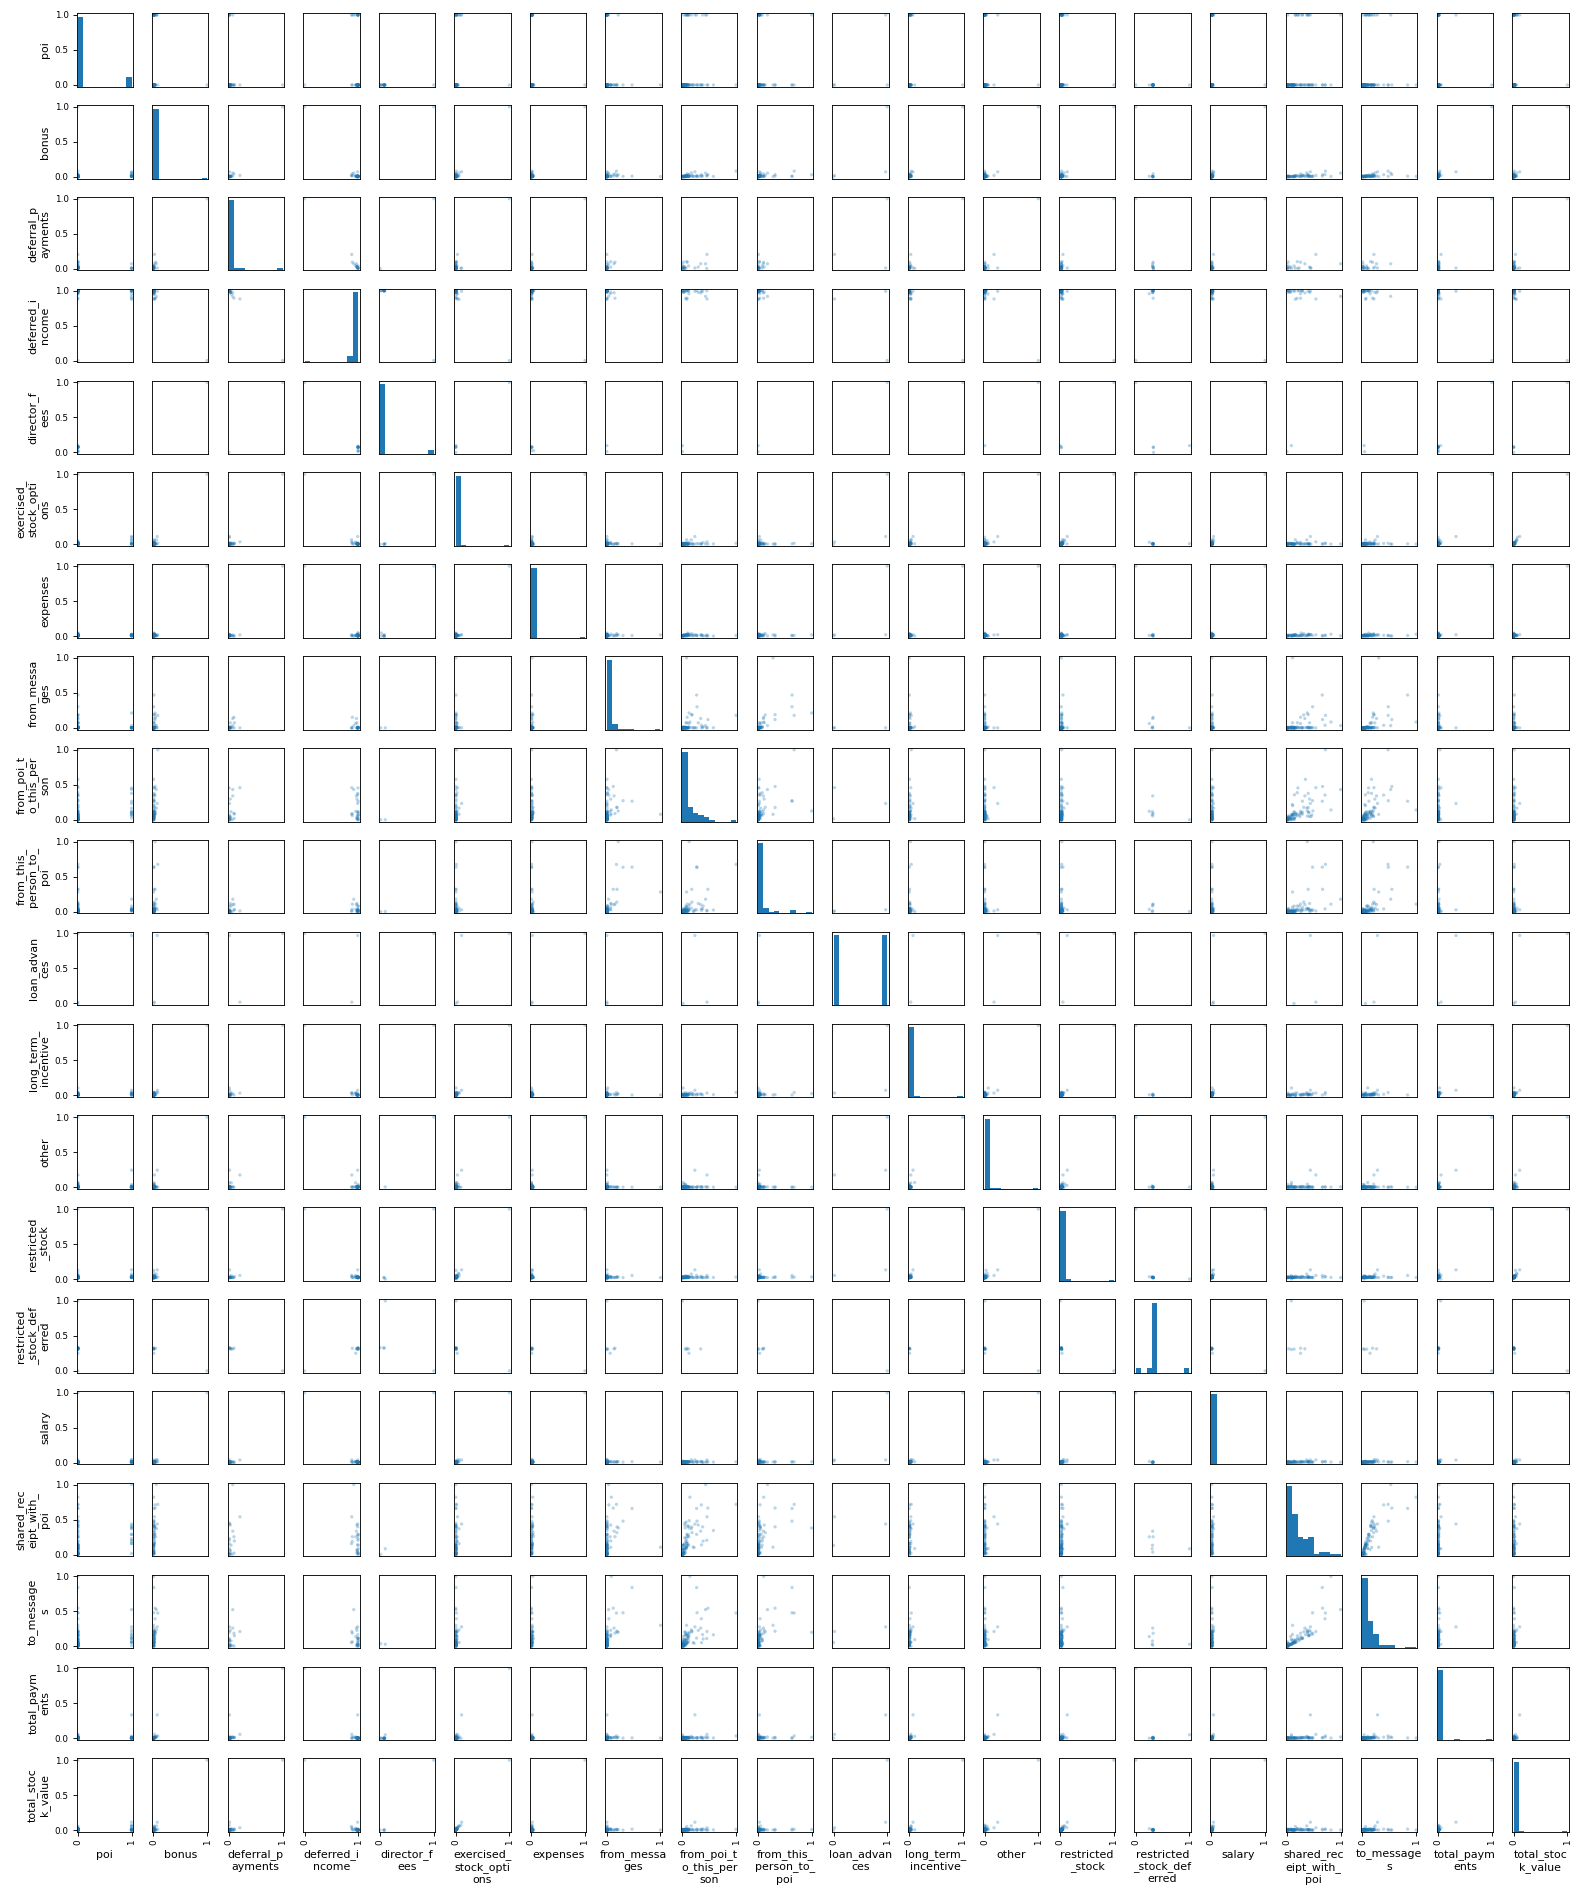

In [13]:
### Represent a scatter matrix for the selected features
Data_Cleaning_Functions.plot_scatter_matrix(data,"maxmin",features_list)

The first thing that gives the attention on this figure is that in most of the scatter plots there seem to be a big difference between some few cases and the majority of the data. The reason of such behaviour was the presence of a "Total" sum entry, as it was found during the Nanodegree course. Therefore, such "TOTAL" entry was disregarded and the scatter matrix was generated again with the rest of data:

In [14]:
### Load the corresponding Data removing the TOTAL entry 
data = Data_Cleaning_Functions.loadData(features_list,total_removal=True,nanFlag=False)

Data succesfully loaded.


<IPython.core.display.Javascript object>


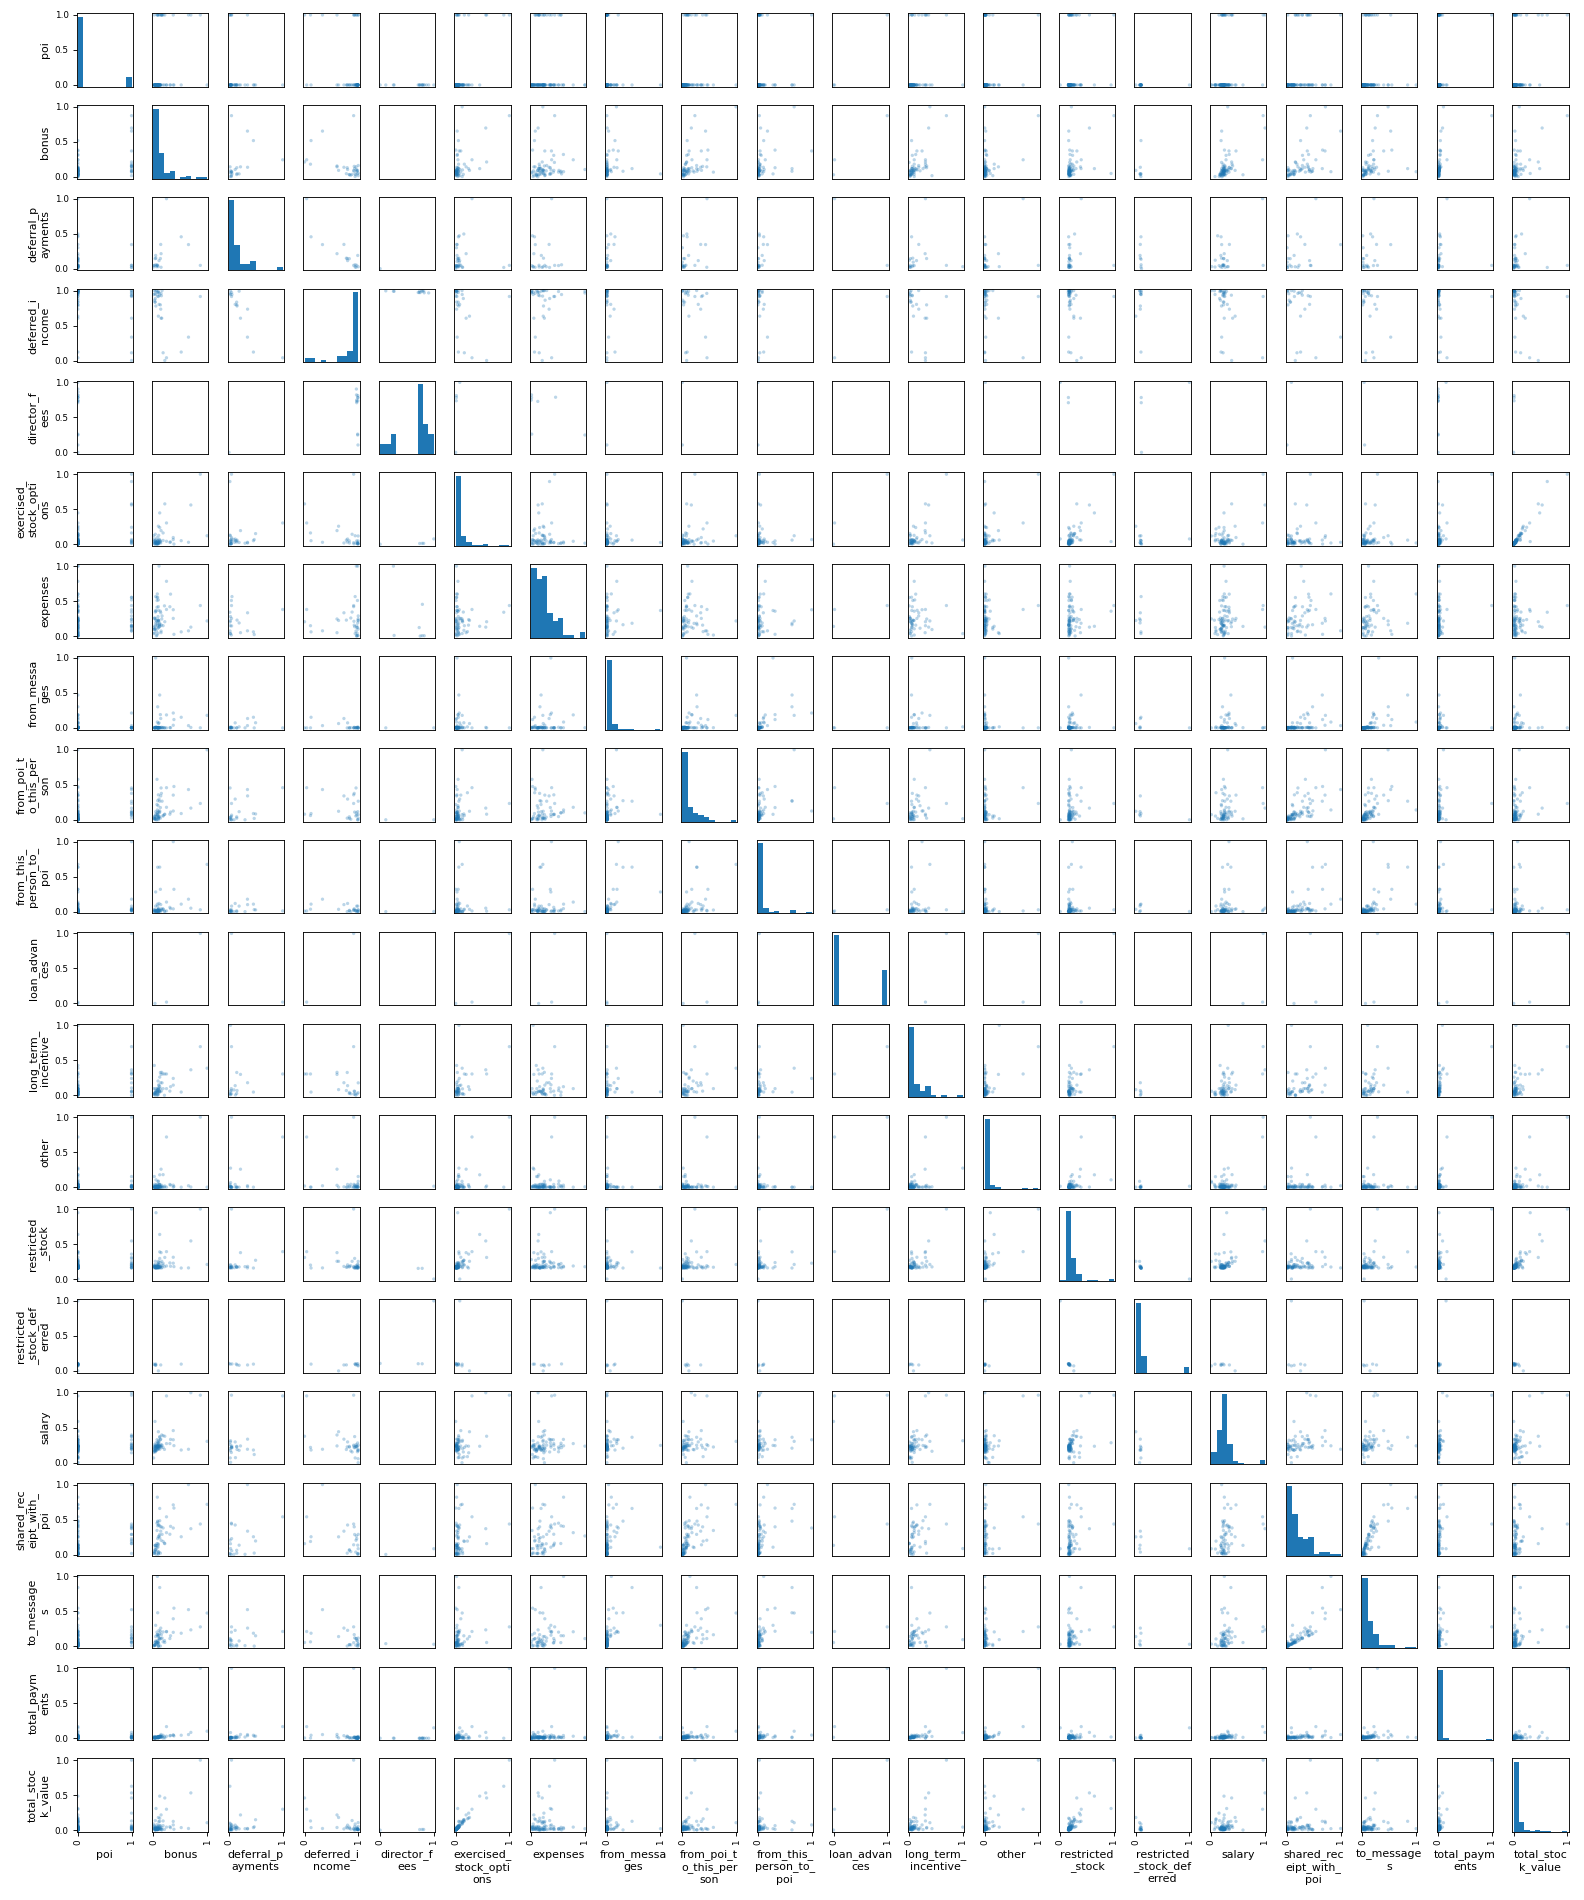

In [15]:
### Represent a scatter matrix for the selected features
Data_Cleaning_Functions.plot_scatter_matrix(data,"maxmin",features_list)

In this new figure, the ranges of the data look more reasonable but it is still observed a big difference between the number of points available for each feature, thus indicating the presence of NaN values.    
Taking advantadge of "missingno" package, the presence of NaN values was represented in the following figure:

<IPython.core.display.Javascript object>


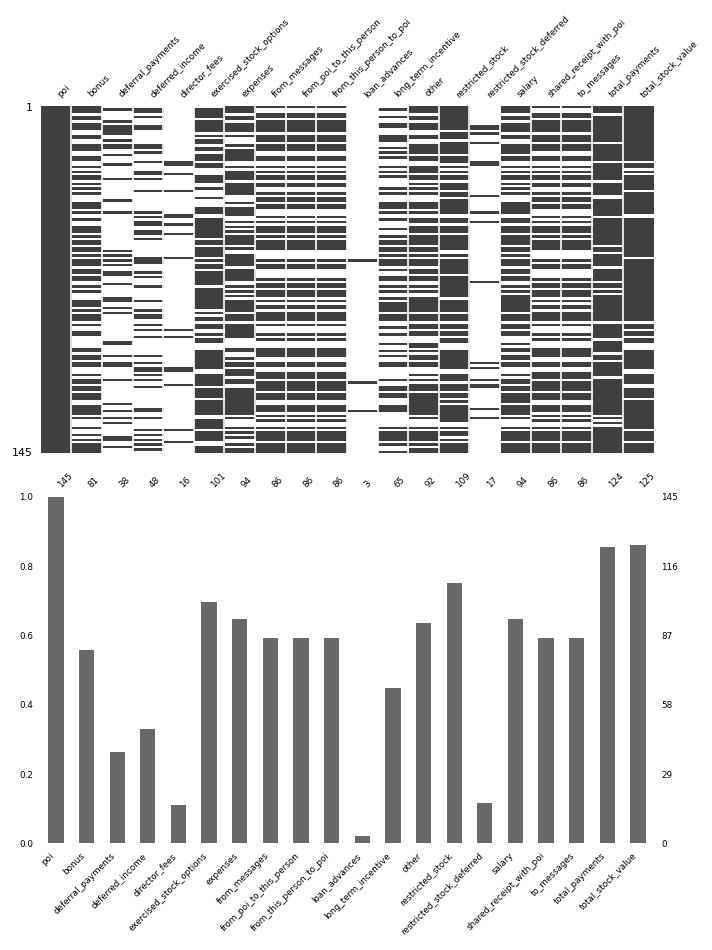

In [16]:
### Represent the amount of NaN values present for each feature
Data_Cleaning_Functions.show_NaN(data,features_list,nplots=2)

In this figure it is clearly seen that the amount of "NaN" values for some of the features (i.e. loan_advances) is huge and so, the information provided by such features will be very limited or even inconclusive. Therefore, it was decided to disregard those features which a ratio of "NaN" values higher than 70%. These discarded features were:

- deferral_payments: 73.8% of NaN values
- director_fees: 88.97% of NaN values
- loan_advances: 97.93% of NaN values
- restricted_stock_deferred: 88.28% of NaN values

Checking again the remaining data, several "NaN" values were still present in all columns (except "poi") that were managed case by case depending on the needs. It was also observed that some rows contained very few data and there was even one case with no data at all (except from "poi" column), which was also removed.

In [17]:
### Define features of Enron's people to be kept
features_list = ['poi','bonus','deferred_income','exercised_stock_options','expenses','from_messages',
                 'from_poi_to_this_person','from_this_person_to_poi','long_term_incentive','other',
                 'restricted_stock','salary','shared_receipt_with_poi','to_messages','total_payments','total_stock_value'] 
### Load the corresponding Data for the selected features 
data = Data_Cleaning_Functions.loadData(features_list,total_removal=True,nanFlag=False)

Data succesfully loaded.


<IPython.core.display.Javascript object>


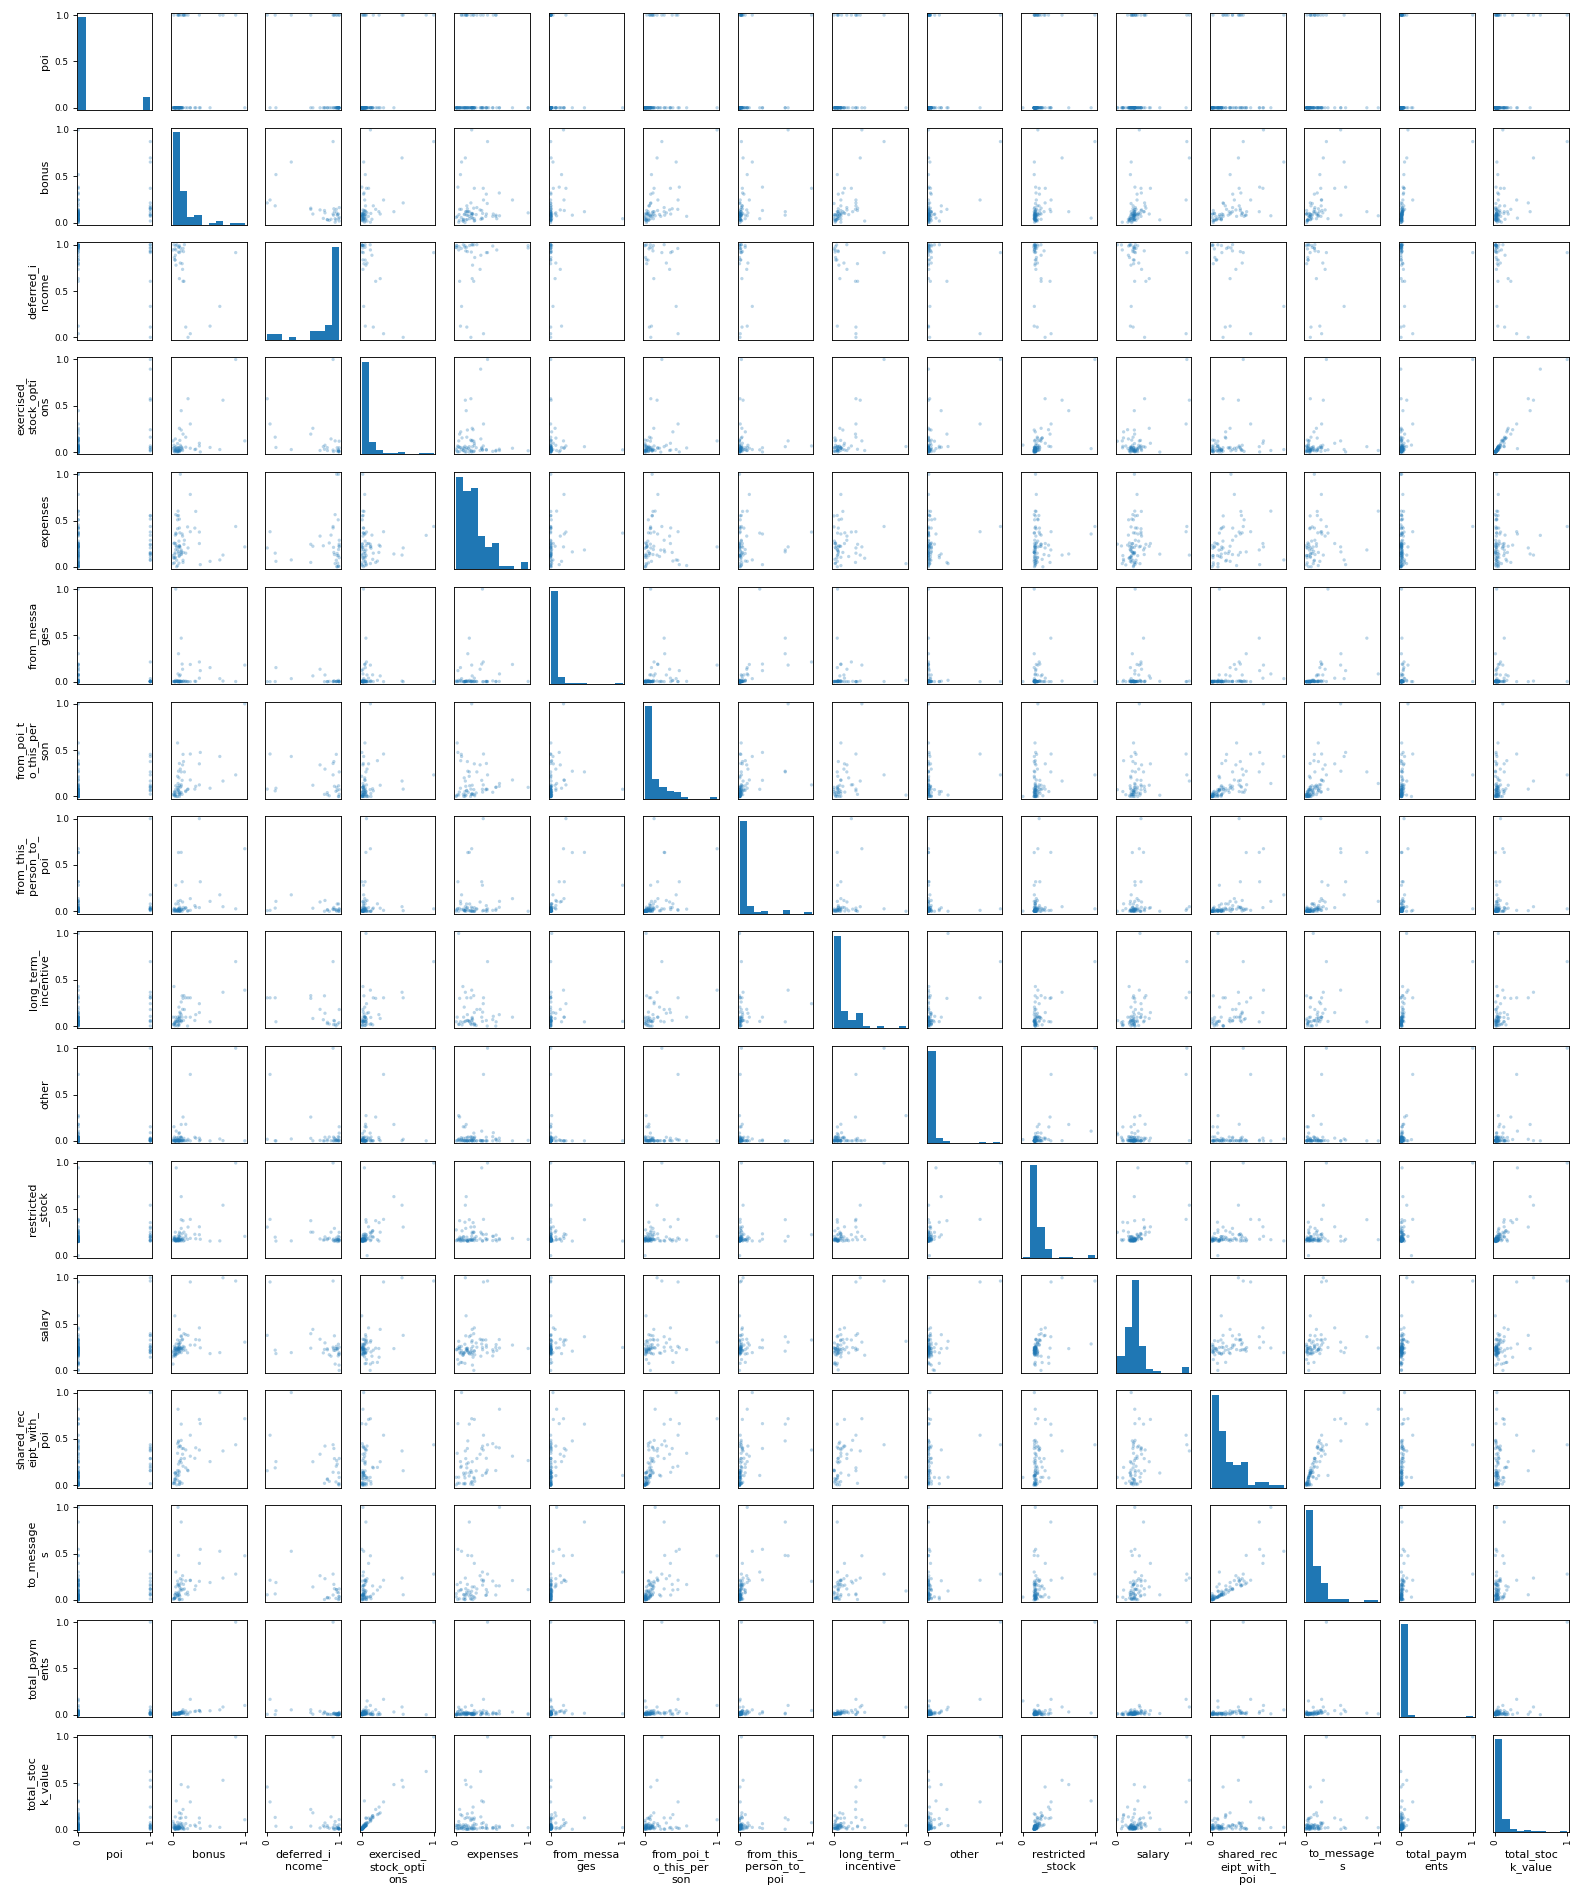

In [18]:
### Represent a scatter matrix for the selected features
Data_Cleaning_Functions.plot_scatter_matrix(data,"maxmin",features_list)

<IPython.core.display.Javascript object>


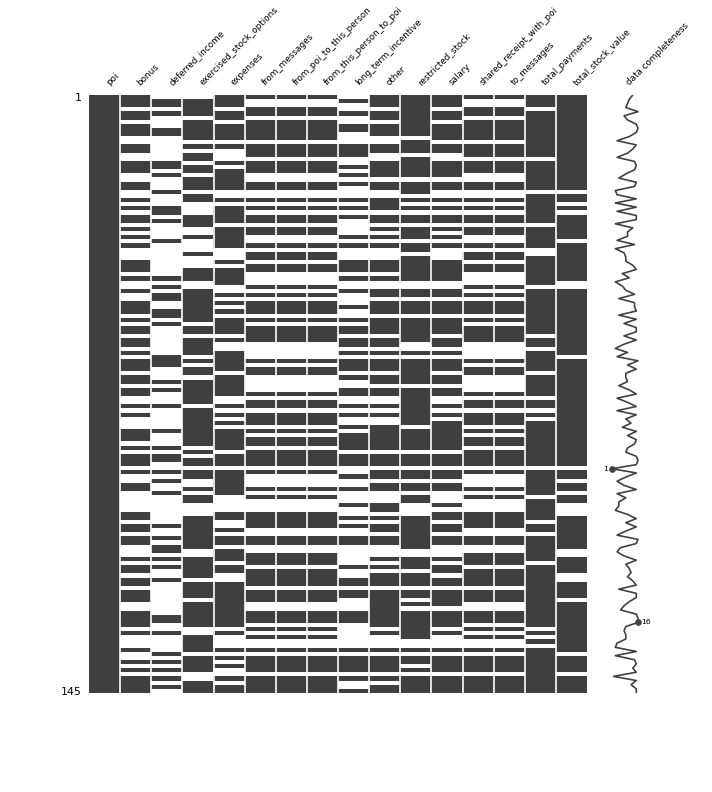

In [19]:
### Represent the amount of NaN values present for each feature>
Data_Cleaning_Functions.show_NaN(data,features_list,nplots=1)

In terms of the distributions of the data, the ranges of the data looked more reasonable now but there still were some points that significantly differed from the others which could be an indication of the presence of additional outliers.  

Apart from the outliers, in the scatter matrix before it was also observed that there were other features that seem to be significantly correlated to each other, thus indicating that the dimensionality of the study most likely could be reduced without a significant loss of information.

In order to determine which features are the most suitable for our analysis without a significant loss of information, an initial Principal Component Analysis study was conducted to make a first selection of the most interesting features for our analysis. For that, the remaining outliers and NaN values were managed as follows:

- In terms of outliers, at this initial stage of the analysis, it was decided to use a common criteria based on the z-score of the sample values and the probability for such value to happen. In this case, it was considered as an outlier those values whose z-score was higher than 3 times the standard deviation (less than 0.13% probability).  
>Note that using this kind of criteria some assumptions are being made in terms of the normality of the data considering that the distribution of each feature follow a Gaussian distribution. Looking at the histograms of the scatter matrix above it was observed that such assumption may be correct for some of the features but for some others maybe this assumption was not the most suitable one. Nevertheless, at this stage and according to the Central Limit Theorem, the assumption of Normality was deemed suitable enough for this first filtering.

- In terms of NaN values, three different options were considered:
    * Replace by zero
    * Replace by the mean of the feature
    * Replace by a random distribution of values that aim to keep constant the standard deviation of the sample.  
As the PCA model is based on the identification of the directions/components that contain the maximum variance, in this first step for feature selection it was decided to use the third option trying to keep the variance of each feature.  
Note that the first option will change both the mean and the variance of the sample and the second option will keep constant the mean of the sample but the variance will vary proportional to the division of samples sizes when considering the NaN values or not.

- In addition, those rows where all features contain NaN values were also discarded.

Before performing the PCA study, all features were also scaled to avoid undesired effects due to the differences between the features scales. In this case, a Scaling based on Maximum and Minimum values of the features was done once the outliers were removed from the sample data.  
Note a Standard Scaler could have been also used here according to the normality assumption mentioned before. However, in this case it was considered enough to use a scaler based on the range without outliers.

Once the dataset was clean and armonized, the PCA study was conducted to determine the number of components that contained most of the variance of the data. In this case, a 95% explained variance ratio was selected as a criteria to determine such number of components.

In [64]:
### Load the corresponding Data for the selected features and removing the TOTAL entry and all blank rows
data = Data_Cleaning_Functions.loadData(features_list,total_removal=False,nanFlag=False,zerosFlag=True)

Data succesfully loaded.


<IPython.core.display.Javascript object>


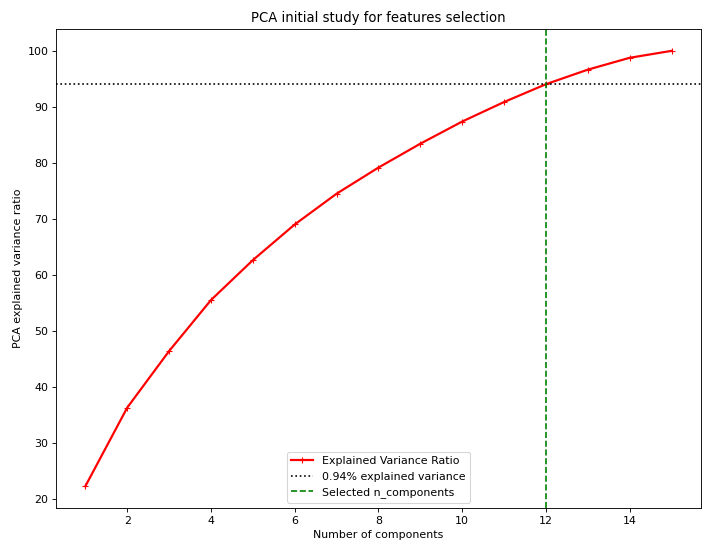

The number of selected features is: 12


In [65]:
### Perform a PCA study to determine the number of components that contain most of the variance of the data
normdata,labels,features,pca,vardf, nbest = Data_Cleaning_Functions.components_selection(data,features_list,True,"maxmin",True,"Zscore",3,True,"variance",0.94)

According to this graph, the PCA study determined that there were 12 main components between the initial 15 selected features that contained at least 95% of the variance of the data.  
>***Note:*** Due to the replacement of the NaN values by a randomly generated sample of data (aiming to keep constant the variance of the features), the results of the PCA study may vary from 12 to 13 components containing the 95% of the variance because sometimes with 12 components the ratio drops to around 94% and 13 are returned as a solution. Nevertheless, 12 components were deemed a good balance for the following analyses (thus 94% threshold was used to assure the algorithm always considers 12 components).

The obtained components were represented in a heatmap to also provide a visualization of the contribution of each feature on the different components:

<IPython.core.display.Javascript object>


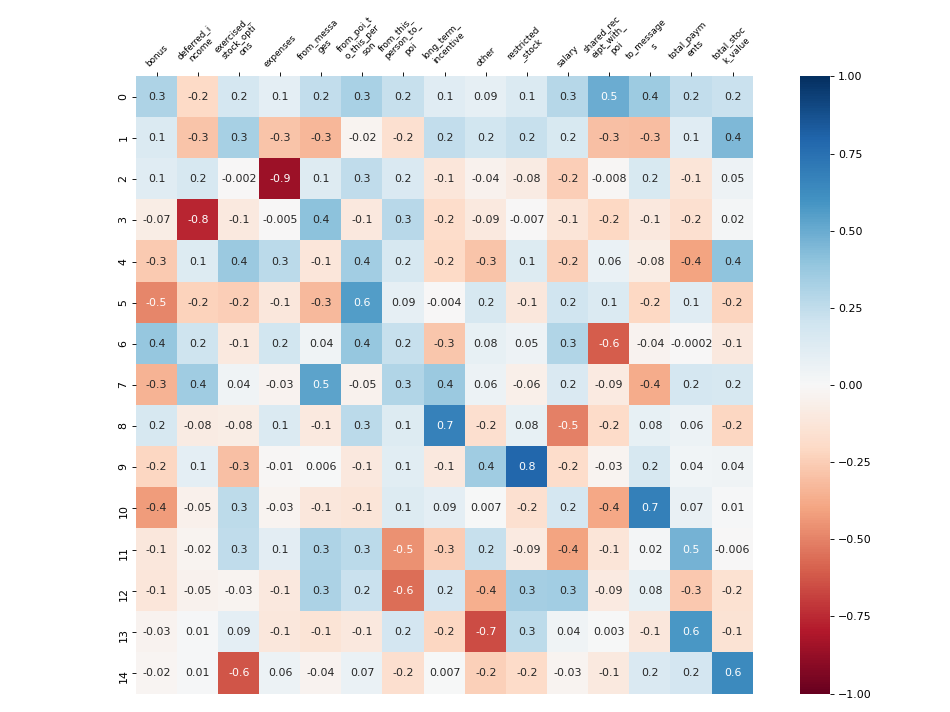

In [66]:
### Shows a Heatmap with the obtained components
Data_Cleaning_Functions.components_heatmap(vardf)

In order to select the 12 best components identified before, a "SelectKBest" method was used together with a "chi2" scoring method to determine which of the features seems more independent from the class and so, let's say more irrelevant for the classification.

<IPython.core.display.Javascript object>


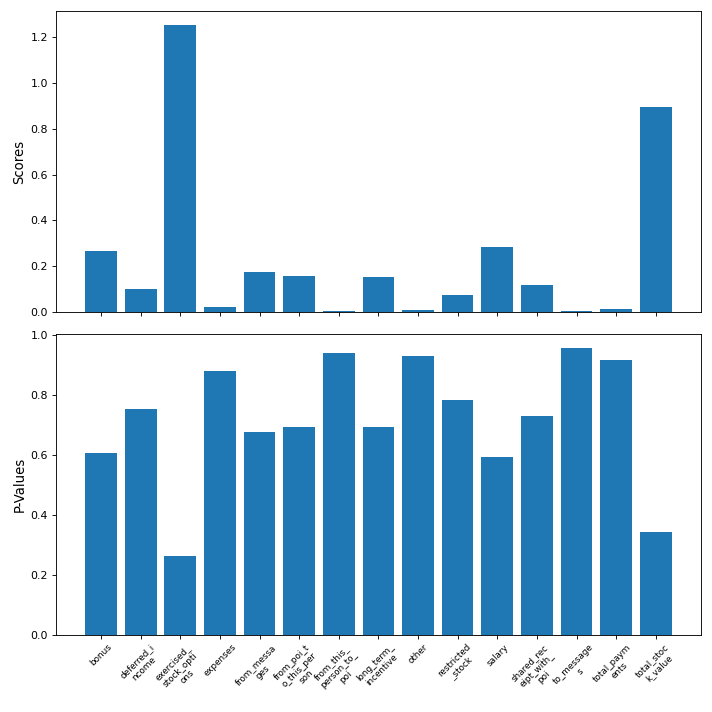

In [67]:
### Select the best features and transform the data into it
clean_data,new_features,features_selected = Data_Cleaning_Functions.best_features_selection('kbest', features_list[1:],normdata,
                                                                                 features,labels,nbest,showPlot=True)

In [68]:
### Show the final Selected features
print("The final features selected for the analysis were:")
pprint.pprint(features_selected)

The final features selected for the analysis were:
['bonus',
 'deferred_income',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'long_term_incentive',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'total_payments',
 'total_stock_value']


Note that, despite 12 features were selected, according to the scores and p-values observed in the previous graphs, there are 2 features "exercised_stock_options" and "total_stock_value" that seem to be the features providing the best scores while some other resulted in very low values. Such behaviour could be due to a correlation between those two features so it will have to be taken into account during the posterior analysis. Note that such two features would have been selected if a SelectPercentile method would have been used instead as follows:

In [69]:
### Select the best features and transform the data into it
opt_data,opt_features,features_optimum = Data_Cleaning_Functions.best_features_selection('percentile', features_list[1:],
                                                                            normdata,features,labels,nbest=10,showPlot=False)
### Show the features giving the highest scores
print("The features that provide the highest scores are:")
pprint.pprint(features_optimum)

The features that provide the highest scores are:
['exercised_stock_options', 'total_stock_value']


The resultant cleaned dataset with the selected 12 features was again represented in a scatter_matrix for a final visually check and was saved as pickle file in a dictionary format (as the original dataset) as an input for the [Exploratory Data Analysis](#eda) section.

<IPython.core.display.Javascript object>


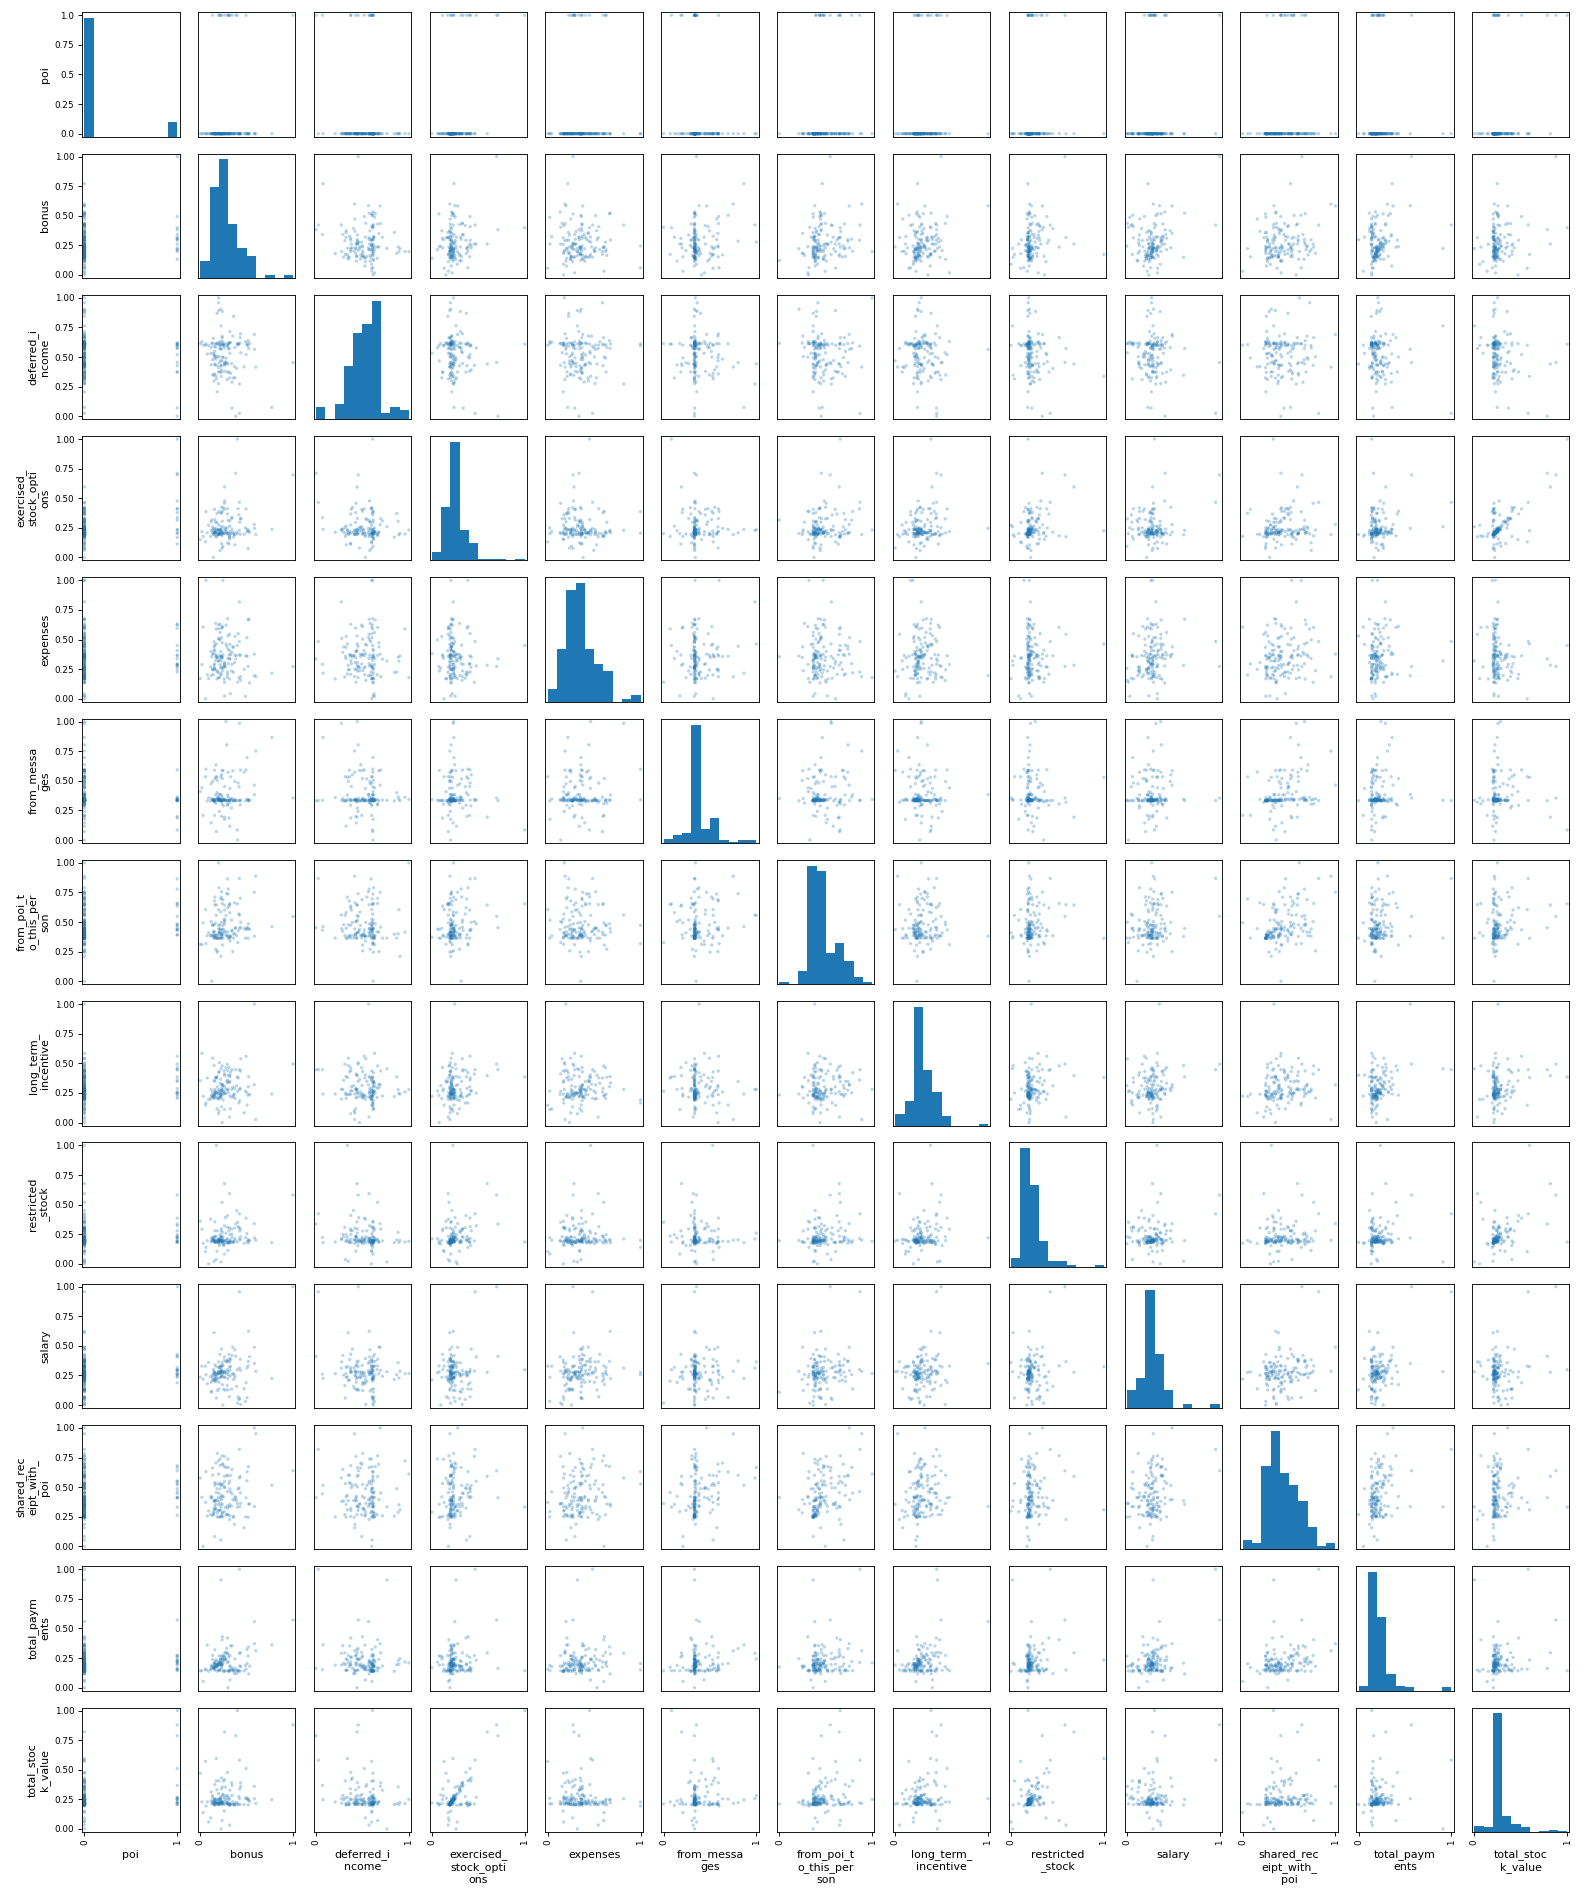

In [70]:
### Represent a scatter matrix for the selected features
Data_Cleaning_Functions.plot_scatter_matrix(clean_data,"maxmin",clean_data.columns)

In [71]:
### Save the cleaned data set into a pickle file
Data_Cleaning_Functions.save_cleaned_data(clean_data,"final_project_dataset_CLEANED.pkl")

Data succesfully saved.


***Summary of Data Cleaning Process:***

- "email_address" was not considered a feature and was not used for the analysis, thus the original dataset contained 19 features.
- The "TOTAL" entry containing the sum of all registers was removed from the dataset.
- Features with a percentage of NaN values higher than 70% were discarded ("deferral_payments", "director_fees", "loan_advances", "restricted_stock_deferred)
- Data points with a z-score (with regards to the feature statistics) higher than 3 were considered outliers and were discarded.
- Rows with only NaN values (apart from "poi") were disregarded. For the rest of data, NaN values were replaced by a randomly generated sample of data normally distributed according to the mean and the standard deviation of the feature, aiming to keep constant the variance of the feature itself. 
- After outliers and NaN values removal, features were scaled using a scaler based on maximum and minimum values.
- An initial PCA study was conducted to determine the number of components that contained at least the 95% explained variance ratio of the data set, resulting in a minimum of 12 components.
- A SelectKBest method was used to select the 12 features that provided the best scoring according to a chi-squared statistic 
- Two of the features were identified as the highest scoring ones ("exercised_stock_options" and "total_stock_value") which could be an indication of correlation.
- The cleaned dataset to be used in the [Exploratory Data Analysis](#eda) section contain 137 registers and 12 features and was saved into a pickle file in a dictionary format.

## Exploratory Data Analysis<a id='eda'></a>

---
<a name='DE_SelTab'></a>
<button name="button"><a href="#DE_OB"><span style="color:blue">Objectives Revision</span></a></button> <button name="button"><a href="#DE_AR"><span style="color:blue">Analysis Results</span></a></button> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#intro"><span style="color:red">Back to Introduction</span></a></button> <button name="button"><a href="#wrangling"><span style="color:red">Back to Data Wrangling</span></a></button> <button name="button"><a href="#limitations"><span style="color:black">Forward to Limitations</span></a></button> <button name="button"><a href="#conclusions"><span style="color:black">Forward to Conclusions</span></a></button>

---

---

### Objectives Revision <a name='DE_OB'></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#eda"><span style="color:black">Up</span></a></button>

After having loaded and cleaned the dataset, [Objectives](#objDef) described at the beggining of this report were still valid as the main aim of this study was to find a "poi" classifier with the available data, adapting the algorithm properly to each need.

---

### Analysis Results & Data Visualization<a name='DE_AR'></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#eda"><span style="color:black">Up</span></a></button>

In the [Data Cleaning](#DW_DC) section, the original dataset for "poi" identification contained 19 features (apart from "email_address" field) and was reduced to the 12 best features that contained at least the 95% (or 94%) explained variance ratio of the data.  

First, a new scatter matrix was represented again but in this case differentiating with a different color (Orange) the data points corresponding to a "poi" to try to visually identify whether a certain kind of classifier may be more appropiate for our analysis for example in case of a certain pattern is identified.

<IPython.core.display.Javascript object>


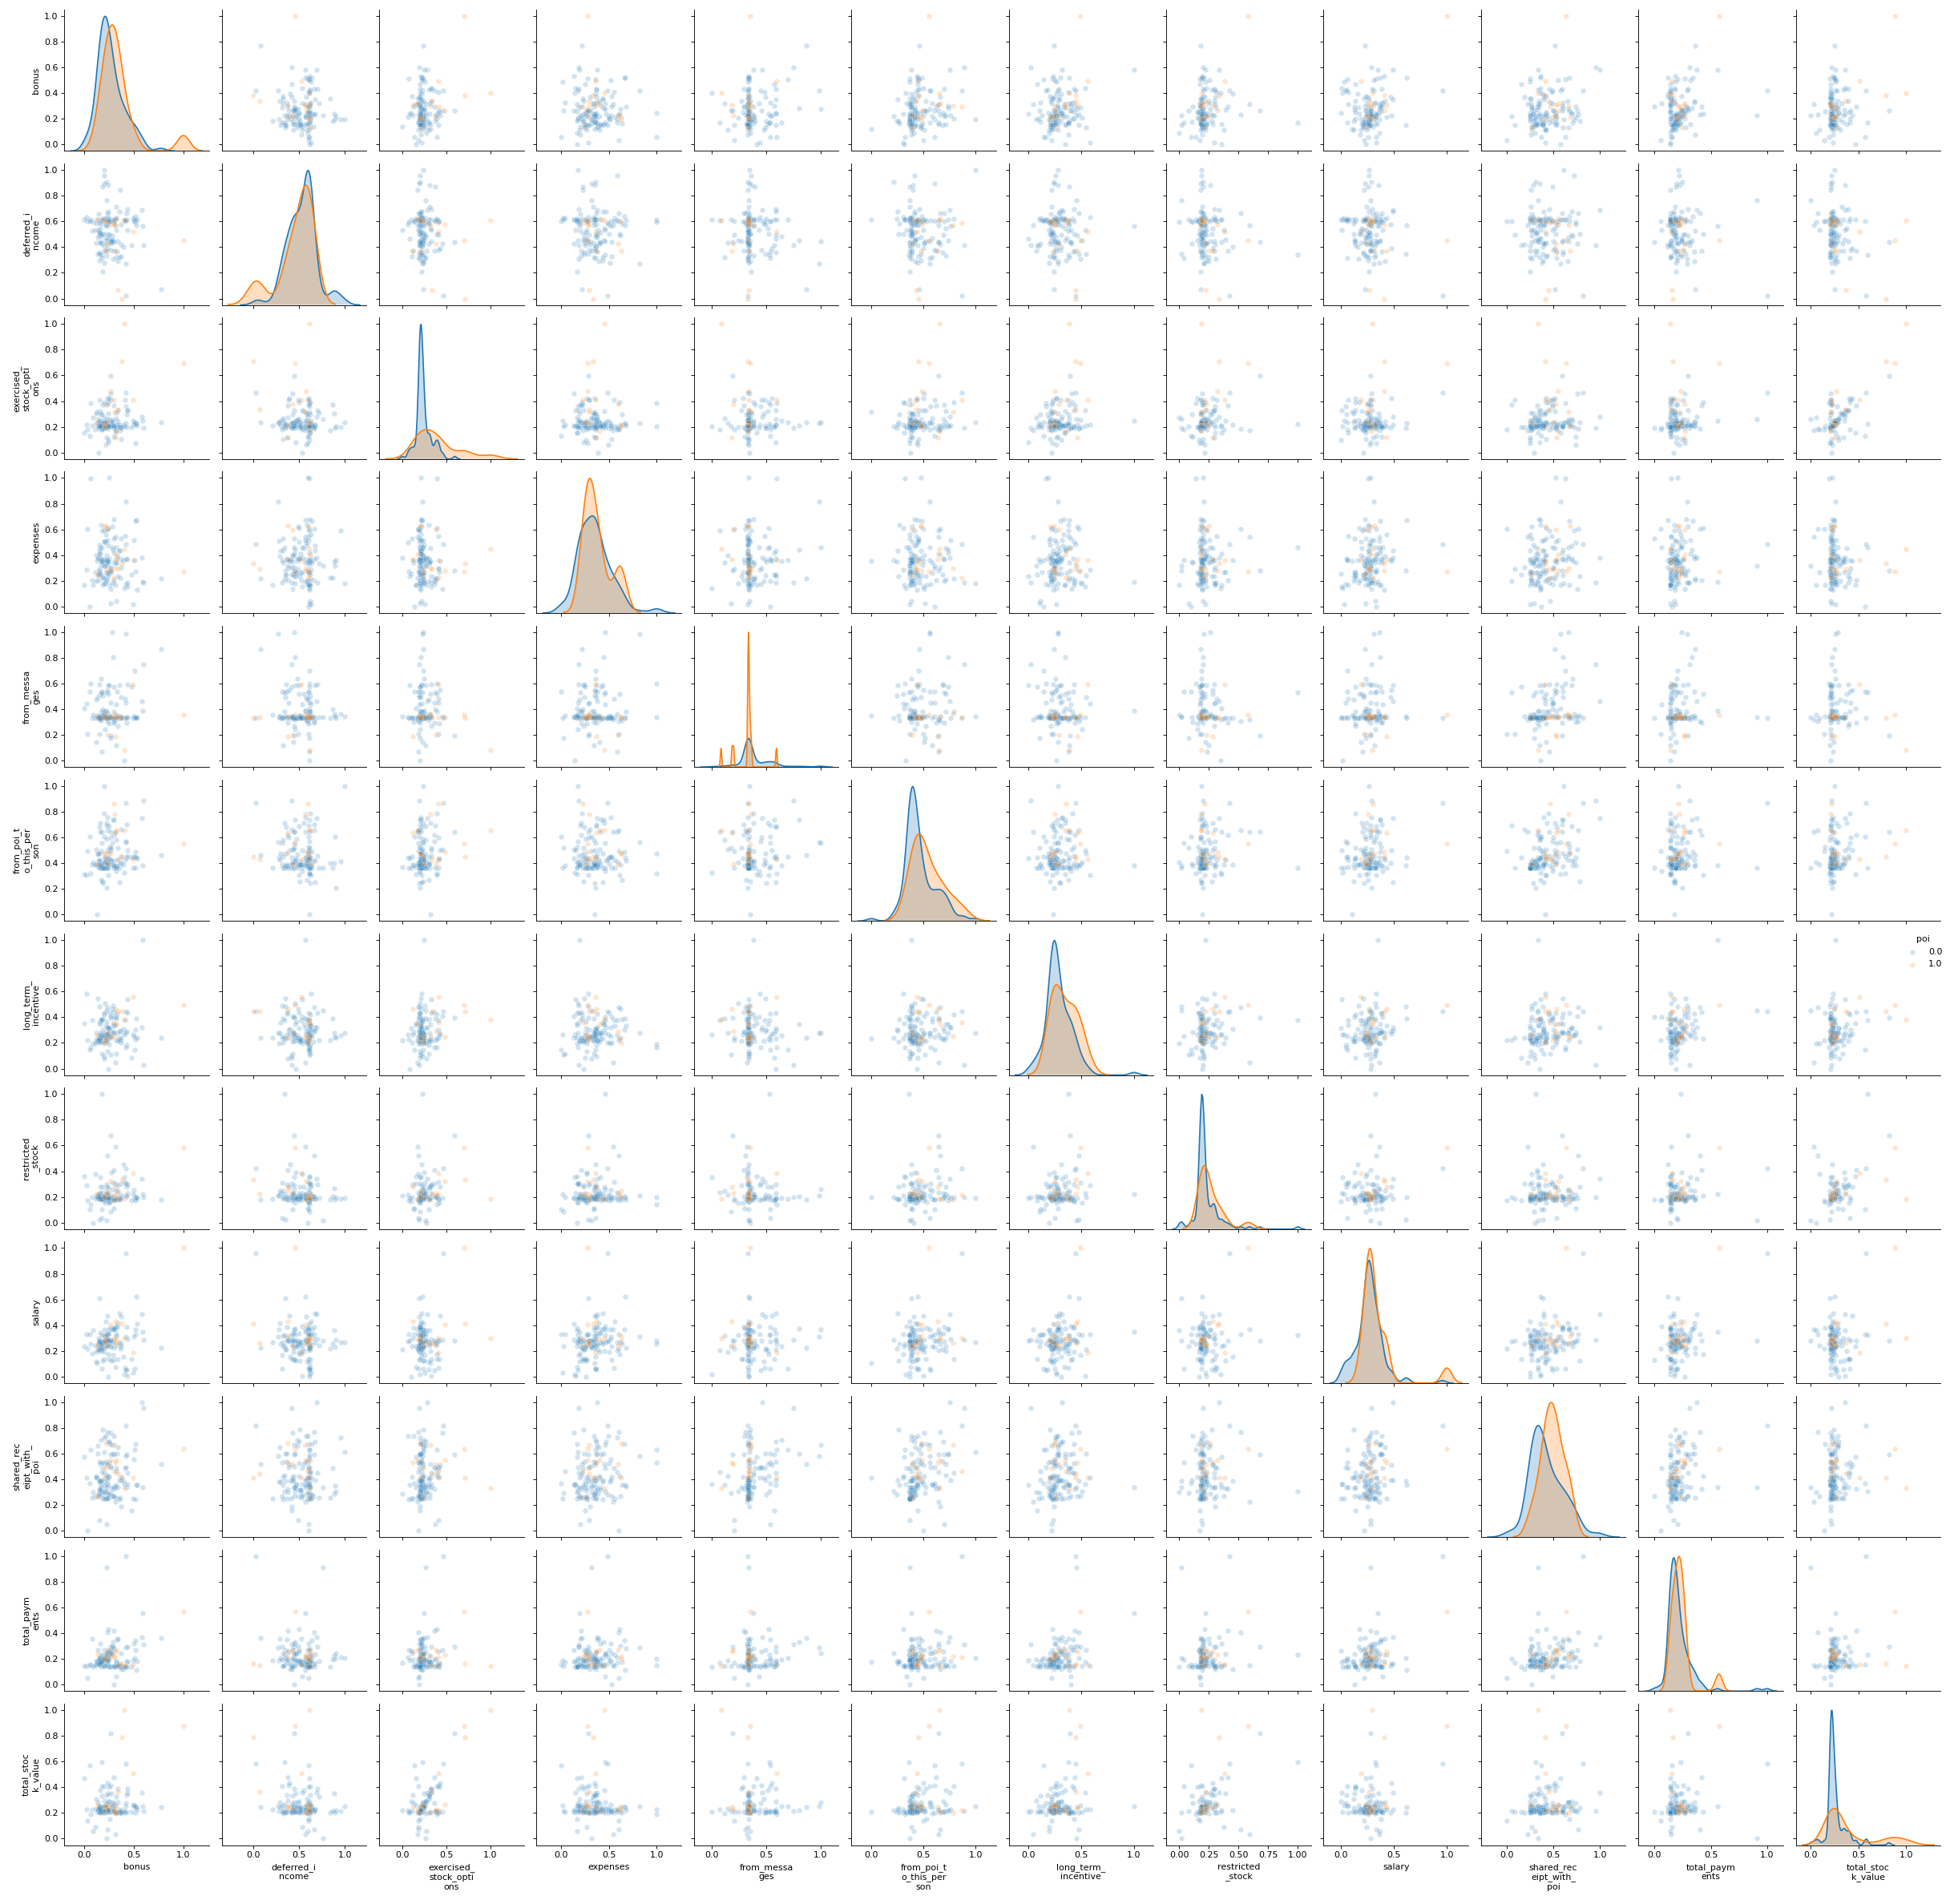

In [72]:
### Represent a scatter matrix for the selected features differentiating pois
poi_id.plot_scatter_matrix(clean_data,'poi')

In these plots, no clear trend in terms of distribution of the orange points (POI) with regards to the blue points (Non_POI) was observed for any of the features, thus apparently there was no "magic" feature(s) allowing to easily identify when a certain data point corresponds to a "poi" or not.  
Therefore, a second PCA method was decided to be used but in this case in combination with a certain classifier in order to identify those really principal components that provide the best scoring accuracy for the selected classifier method and configuration.  
However, in the scatter matrix above it was observed that there seems to be a high correlation between the "exercised_stock_options" and the "total_stock_value" features which is not good for machine learning algorithms, thus a previous PCA was also conducted only for those features to reduce them to just one component.

In terms of classifier, no clear clue from the scatter matrix could be obtained to decide at this point which classifier could be the best option (maybe a Decision Tree classifier could work well in this case to take into account the non-linearity of the problem-or maybe an ensemble method could be also appropiate as the size of the sample is not so high), thus several classifiers were tested to select the one giving the best results.

The complete study could be summarized as follows:

- A second outliers removal step was done with the cleaned dataset using in this case an unsupervised "Local Outlier Factor" (LOF) algorithm. Note that during the cleaning process the most significant outliers were already removed but the aim of this second step is to fine-tune the selection of the data really used for our classificator and, in particular, to assure that none of the values that were randomly generated during the NaN cleaning process before significantly differs from the rest of the data. 
- In terms of NaN values, they were already replaced during the data cleaning process and so the current dataset is free of null values.
- A PCA model was used to reduce the correlated "exercised_stock_options" and the "total_stock_value" features into just one component.
- Despite of during the cleaning process all features were scaled based on maximum and minimum values criteria, the scaling process was repeated again for all features to assure consistency of the data in case additional outliers were removed in the first bullet. In this case, the same scaler based on maximum and minimum values was used because for some features it may not be fully appropiate to use a certain scaler (i.e. standard scaler).
- Once the fine-tuning process above was done, the resultant dataset was divided into two samples of data: one for "Training" and one for "Testing", keeping 30% of the data points for testing the accuracy of the classifiers. Note that a Stratified split was used to cope with the different percentages of classes at the original dataset (i.e. to avoid ending with a test sample of data containing only one class).
- Regarding to the analysis itself, a pipeline was defined containing the PCA method and all classifiers to be tested (up to 10 different classifiers), and a GridSearch was conducted on several parameters of the different elements of the pipeline to determine the best configuration and the best classifier.  
The components of the pipeline and the parameters that were tested were:  
    * PCA:
        - n_components: [1:12]
        - random_state: [42]
    * GaussianNB:
    * SVM:
        - kernel: ['linear', 'poly', 'rbf']
        - Gamma: [None, 1, 10]
        - degree: [2, 3]
        - C: [1, 10, 100]
        - random_state: [42]
    * Decission Tree:
        - criterion: ['gini', 'entropy']
        - min_samples_split: [1, 5, 10, 20, 50]
        - random_state: [42]        
    * Extra Tree:
        - criterion: ['gini', 'entropy']
        - min_samples_split: [1, 5, 10, 20, 50]
        - random_state: [42]
    * KNeighbors:
        - n_neighbors: [5, 10, 50]
        - weights: ['uniform', 'distance']
        - algorithm: ['auto', 'ball_tree', 'kd_tree']
    * RadiusNeighbors:
        - radius: [0.1, 0.2, 0.5, 1]
        - weights: ['uniform', 'distance']
        - algorithm: ['auto', 'ball_tree', 'kd_tree']
    * Adaboost:
        - n_estimators: [10, 25, 50]
        - random_state: [42]
    * RandomForest:
        - n_estimators: [10, 50, 100]
        - criterion: ['gini', 'entropy']
        - min_samples_split: [1, 5, 10, 20, 50]
        - random_state: [42]
    * GradientBoosting:
        - n_estimators: [10, 50, 100]
        - criterion: ['mse', 'mae']
        - min_samples_split: [1, 5, 10, 20, 50]
        - random_state: [42]
    * MLPC:
        - max_iter: [200, 300, 500, 1000, 5000]
        - random_state: [42]
        

- The GridSearch was conducted with cross validation over 10 folds, to minimize the impact of the limited sample size.
- Results of the conducted search were compared between the different types of classifiers to determine the best option giving the best classification results but also to check whether there is any trend of overfitting with any of the classifiers.
- To select the final classifier for our study, the calibration curves with the best estimators for each type of classifier were also compared to each other and the precision, recall and f1-score were obtained for each of them, both when using training and testing samples of data. Final selection was based on the precision obtained when identifying a "poi" but also taking into account the rest of results from the search.
- Once the type of classifier was selected, the corresponding best estimator was recovered from the conducted search to make the corresponding predictions over the testing sample for validation.

In [73]:
### TASK1: Loads the corresponding data from the stored pickle file
# Identifies the list of features to be used after the cleaning process
features_list = ['poi']
[features_list.append(x) for x in features_selected]
# Loads data
data = poi_id.task1_select_features("data/final_project_dataset_CLEANED.pkl",features_list)

##############################################################
Loading Data:
##############################################################
Selected Features:
['poi',
 'bonus',
 'deferred_income',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'long_term_incentive',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'total_payments',
 'total_stock_value']
Data succesfully loaded.


##############################################################
Outliers identification:
##############################################################


<IPython.core.display.Javascript object>


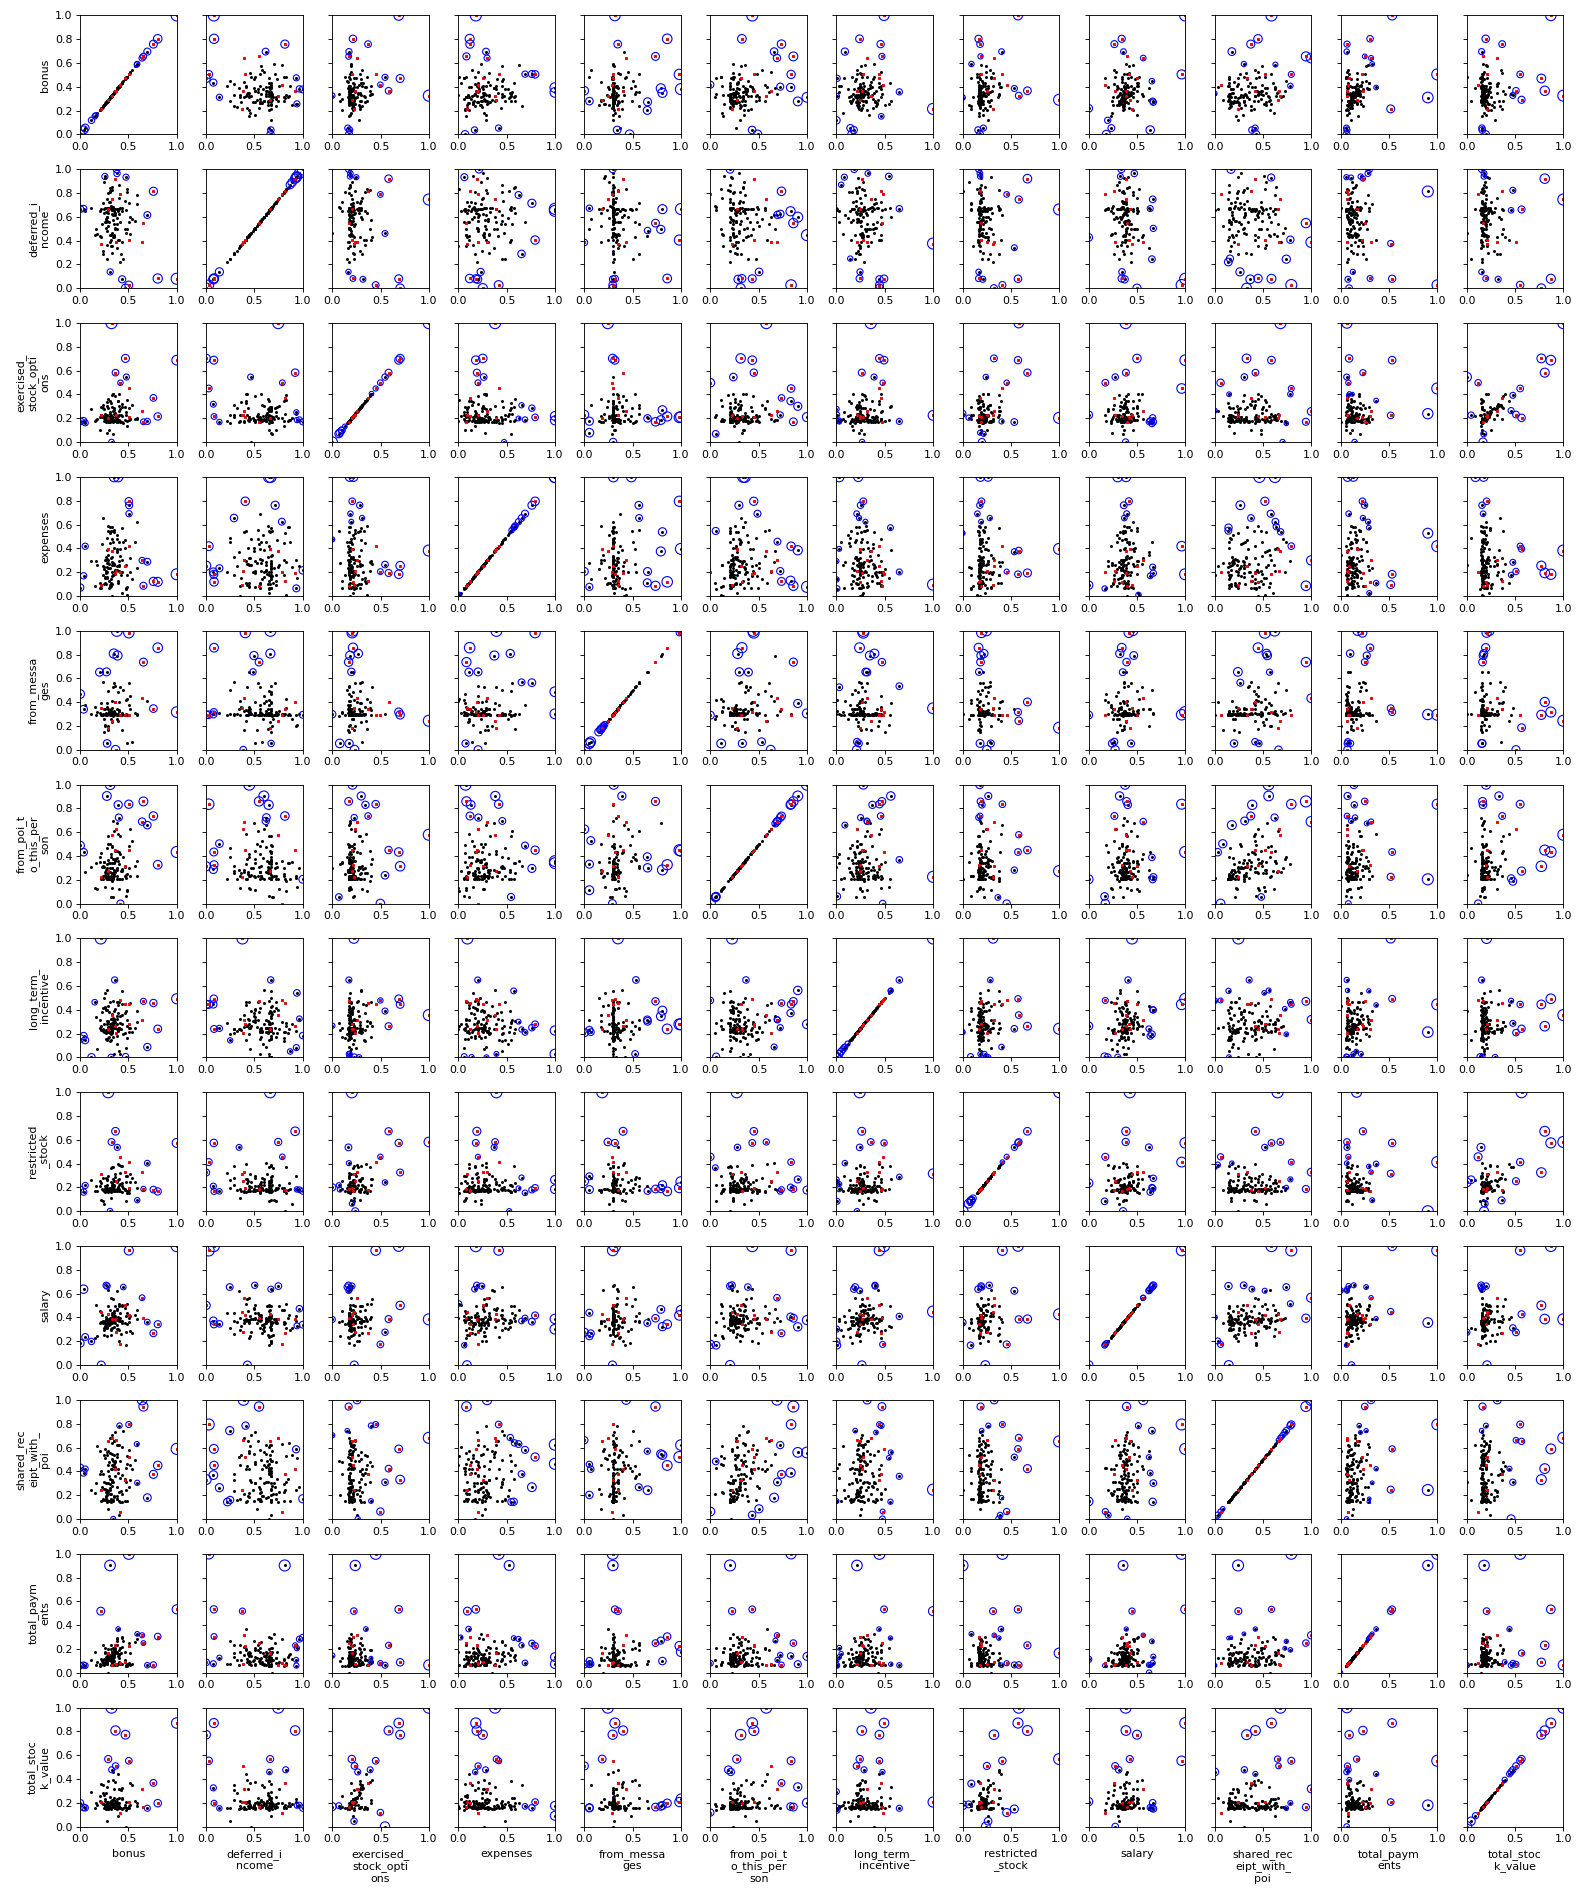

LOF algorithm detected an average of 14 potential outliers on each combination of features (circled in blue).
Considering all features at once, a total of 14 outliers were finally selected as real outliers (red points), thus discarded for the analysis
for each pair of features, an average value of 5 outliers predicted by the LOF method were finally removed.
Outliers identification completed.


In [74]:
### TASK2: Remove outliers using LOF algorithm
outdata = poi_id.task2_remove_outliers(data,50,0.1,0.9,True)

##############################################################
Combine correlated features:
##############################################################
Correlated features succesfully combined in "stock_features" component.


<IPython.core.display.Javascript object>


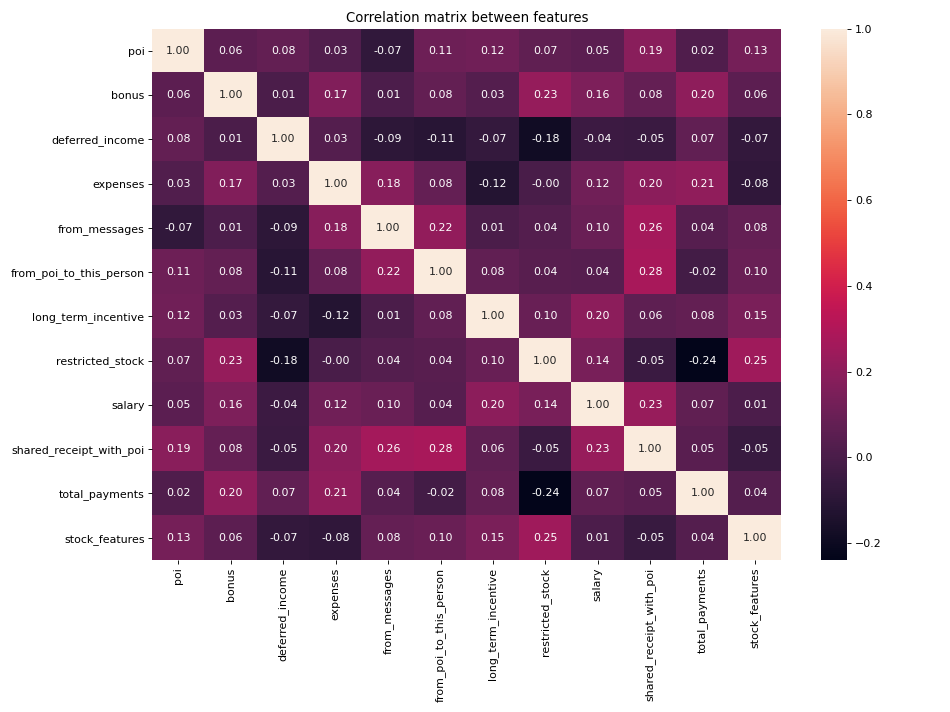



###############################
Scaling data:
###############################
Data scaled succesfully.


###############################
Getting Features and Labels
###############################
Features and Labels succesfully identified.


In [75]:
### TASK3: Creates new features by combining correlated features and scaling data
normdata, features_list, features, labels, my_dataset = poi_id.task3_tune_features(outdata,features_list,corrFlag=True,scaleFlag=True)

In [76]:
### TASK4a: Conducts a GridSearch over all candidates and possible configurations
clfs, features_train, labels_train, features_test, labels_test = poi_id.task4_classifiers_search(normdata,
                                                                                                 features_list,features,
                                                                                                 labels,'accuracy')



###############################
Dividing data set for training and validation:
###############################
Training and Validation data succesfully defined.


###############################
Performing GridSearch over selected classifiers:
###############################

Running GridSearchCV for Pipeline(steps=[('PCA', PCA()), ('NB', GaussianNB())]).
dict_keys(['memory', 'steps', 'verbose', 'PCA', 'NB', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'NB__priors', 'NB__var_smoothing'])
Fitting 10 folds for each of 11 candidates, totalling 110 fits


D:\Programas\Anaconda\envs\ADS_DataAnalystND\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    0.9s finished
D:\Programas\Anaconda\envs\ADS_DataAnalystND\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


	Best parameter (CV score=0.908):
	 {'PCA__n_components': 1, 'PCA__random_state': 42}

Running GridSearchCV for Pipeline(steps=[('PCA', PCA()), ('SVM', SVC())]).
dict_keys(['memory', 'steps', 'verbose', 'PCA', 'SVM', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'SVM__C', 'SVM__break_ties', 'SVM__cache_size', 'SVM__class_weight', 'SVM__coef0', 'SVM__decision_function_shape', 'SVM__degree', 'SVM__gamma', 'SVM__kernel', 'SVM__max_iter', 'SVM__probability', 'SVM__random_state', 'SVM__shrinking', 'SVM__tol', 'SVM__verbose'])
Fitting 10 folds for each of 594 candidates, totalling 5940 fits


[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 5940 out of 5940 | elapsed:    3.7s finished
D:\Programas\Anaconda\envs\ADS_DataAnalystND\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


	Best parameter (CV score=0.908):
	 {'PCA__n_components': 1, 'PCA__random_state': 42, 'SVM__C': 1, 'SVM__degree': 2, 'SVM__gamma': 1, 'SVM__kernel': 'linear', 'SVM__random_state': 42}

Running GridSearchCV for Pipeline(steps=[('PCA', PCA()), ('DT', DecisionTreeClassifier())]).
dict_keys(['memory', 'steps', 'verbose', 'PCA', 'DT', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'DT__ccp_alpha', 'DT__class_weight', 'DT__criterion', 'DT__max_depth', 'DT__max_features', 'DT__max_leaf_nodes', 'DT__min_impurity_decrease', 'DT__min_impurity_split', 'DT__min_samples_leaf', 'DT__min_samples_split', 'DT__min_weight_fraction_leaf', 'DT__presort', 'DT__random_state', 'DT__splitter'])
Fitting 10 folds for each of 110 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Done 1025 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.2s finished
D:\Programas\Anaconda\envs\ADS_DataAnalystND\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


	Best parameter (CV score=0.908):
	 {'DT__criterion': 'gini', 'DT__min_samples_split': 50, 'DT__random_state': 42, 'PCA__n_components': 1, 'PCA__random_state': 42}

Running GridSearchCV for Pipeline(steps=[('PCA', PCA()), ('ET', ExtraTreeClassifier())]).
dict_keys(['memory', 'steps', 'verbose', 'PCA', 'ET', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'ET__ccp_alpha', 'ET__class_weight', 'ET__criterion', 'ET__max_depth', 'ET__max_features', 'ET__max_leaf_nodes', 'ET__min_impurity_decrease', 'ET__min_impurity_split', 'ET__min_samples_leaf', 'ET__min_samples_split', 'ET__min_weight_fraction_leaf', 'ET__random_state', 'ET__splitter'])
Fitting 10 folds for each of 110 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.1s finished
D:\Programas\Anaconda\envs\ADS_DataAnalystND\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


	Best parameter (CV score=0.908):
	 {'ET__criterion': 'gini', 'ET__min_samples_split': 10, 'ET__random_state': 42, 'PCA__n_components': 5, 'PCA__random_state': 42}

Running GridSearchCV for Pipeline(steps=[('PCA', PCA()), ('KN', KNeighborsClassifier())]).
dict_keys(['memory', 'steps', 'verbose', 'PCA', 'KN', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'KN__algorithm', 'KN__leaf_size', 'KN__metric', 'KN__metric_params', 'KN__n_jobs', 'KN__n_neighbors', 'KN__p', 'KN__weights'])
Fitting 10 folds for each of 198 candidates, totalling 1980 fits


[Parallel(n_jobs=-1)]: Done 1324 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1965 out of 1980 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1980 out of 1980 | elapsed:    1.6s finished
D:\Programas\Anaconda\envs\ADS_DataAnalystND\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


	Best parameter (CV score=0.921):
	 {'KN__algorithm': 'auto', 'KN__n_neighbors': 5, 'KN__weights': 'uniform', 'PCA__n_components': 9, 'PCA__random_state': 42}

Running GridSearchCV for Pipeline(steps=[('PCA', PCA()), ('RN', RadiusNeighborsClassifier())]).
dict_keys(['memory', 'steps', 'verbose', 'PCA', 'RN', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'RN__algorithm', 'RN__leaf_size', 'RN__metric', 'RN__metric_params', 'RN__n_jobs', 'RN__outlier_label', 'RN__p', 'RN__radius', 'RN__weights'])
Fitting 10 folds for each of 132 candidates, totalling 1320 fits


[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1320 out of 1320 | elapsed:    1.1s finished
D:\Programas\Anaconda\envs\ADS_DataAnalystND\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


	Best parameter (CV score=0.908):
	 {'PCA__n_components': 1, 'PCA__random_state': 42, 'RN__algorithm': 'auto', 'RN__radius': 2, 'RN__weights': 'uniform'}

Running GridSearchCV for Pipeline(steps=[('PCA', PCA()), ('AB', AdaBoostClassifier())]).
dict_keys(['memory', 'steps', 'verbose', 'PCA', 'AB', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'AB__algorithm', 'AB__base_estimator', 'AB__learning_rate', 'AB__n_estimators', 'AB__random_state'])
Fitting 10 folds for each of 33 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:    1.4s finished
D:\Programas\Anaconda\envs\ADS_DataAnalystND\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


	Best parameter (CV score=0.919):
	 {'AB__n_estimators': 50, 'AB__random_state': 42, 'PCA__n_components': 11, 'PCA__random_state': 42}

Running GridSearchCV for Pipeline(steps=[('PCA', PCA()), ('RF', RandomForestClassifier())]).
dict_keys(['memory', 'steps', 'verbose', 'PCA', 'RF', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'RF__bootstrap', 'RF__ccp_alpha', 'RF__class_weight', 'RF__criterion', 'RF__max_depth', 'RF__max_features', 'RF__max_leaf_nodes', 'RF__max_samples', 'RF__min_impurity_decrease', 'RF__min_impurity_split', 'RF__min_samples_leaf', 'RF__min_samples_split', 'RF__min_weight_fraction_leaf', 'RF__n_estimators', 'RF__n_jobs', 'RF__oob_score', 'RF__random_state', 'RF__verbose', 'RF__warm_start'])
Fitting 10 folds for each of 330 candidates, totalling 3300 fits


[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 1904 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 3285 out of 3300 | elapsed:   19.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 3300 out of 3300 | elapsed:   19.8s finished
D:\Programas\Anaconda\envs\ADS_DataAnalystND\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


	Best parameter (CV score=0.908):
	 {'PCA__n_components': 1, 'PCA__random_state': 42, 'RF__criterion': 'gini', 'RF__min_samples_split': 20, 'RF__n_estimators': 10, 'RF__random_state': 42}

Running GridSearchCV for Pipeline(steps=[('PCA', PCA()), ('GB', GradientBoostingClassifier())]).
dict_keys(['memory', 'steps', 'verbose', 'PCA', 'GB', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'GB__ccp_alpha', 'GB__criterion', 'GB__init', 'GB__learning_rate', 'GB__loss', 'GB__max_depth', 'GB__max_features', 'GB__max_leaf_nodes', 'GB__min_impurity_decrease', 'GB__min_impurity_split', 'GB__min_samples_leaf', 'GB__min_samples_split', 'GB__min_weight_fraction_leaf', 'GB__n_estimators', 'GB__n_iter_no_change', 'GB__presort', 'GB__random_state', 'GB__subsample', 'GB__tol', 'GB__validation_fraction', 'GB__verbose', 'GB__warm_start'])
Fitting 10 folds for each of 330 candidates, totalling 3300 fits


[Parallel(n_jobs=-1)]: Done 1520 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 3300 out of 3300 | elapsed:    9.4s finished
D:\Programas\Anaconda\envs\ADS_DataAnalystND\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


	Best parameter (CV score=0.919):
	 {'GB__criterion': 'mse', 'GB__min_samples_split': 5, 'GB__n_estimators': 50, 'GB__random_state': 42, 'PCA__n_components': 9, 'PCA__random_state': 42}

Running GridSearchCV for Pipeline(steps=[('PCA', PCA()), ('MLPC', MLPClassifier())]).
dict_keys(['memory', 'steps', 'verbose', 'PCA', 'MLPC', 'PCA__copy', 'PCA__iterated_power', 'PCA__n_components', 'PCA__random_state', 'PCA__svd_solver', 'PCA__tol', 'PCA__whiten', 'MLPC__activation', 'MLPC__alpha', 'MLPC__batch_size', 'MLPC__beta_1', 'MLPC__beta_2', 'MLPC__early_stopping', 'MLPC__epsilon', 'MLPC__hidden_layer_sizes', 'MLPC__learning_rate', 'MLPC__learning_rate_init', 'MLPC__max_fun', 'MLPC__max_iter', 'MLPC__momentum', 'MLPC__n_iter_no_change', 'MLPC__nesterovs_momentum', 'MLPC__power_t', 'MLPC__random_state', 'MLPC__shuffle', 'MLPC__solver', 'MLPC__tol', 'MLPC__validation_fraction', 'MLPC__verbose', 'MLPC__warm_start'])
Fitting 10 folds for each of 55 candidates, totalling 550 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   13.1s


	Best parameter (CV score=0.908):
	 {'MLPC__max_iter': 200, 'MLPC__random_state': 42, 'PCA__n_components': 1, 'PCA__random_state': 42}


[Parallel(n_jobs=-1)]: Done 550 out of 550 | elapsed:   18.1s finished


<IPython.core.display.Javascript object>


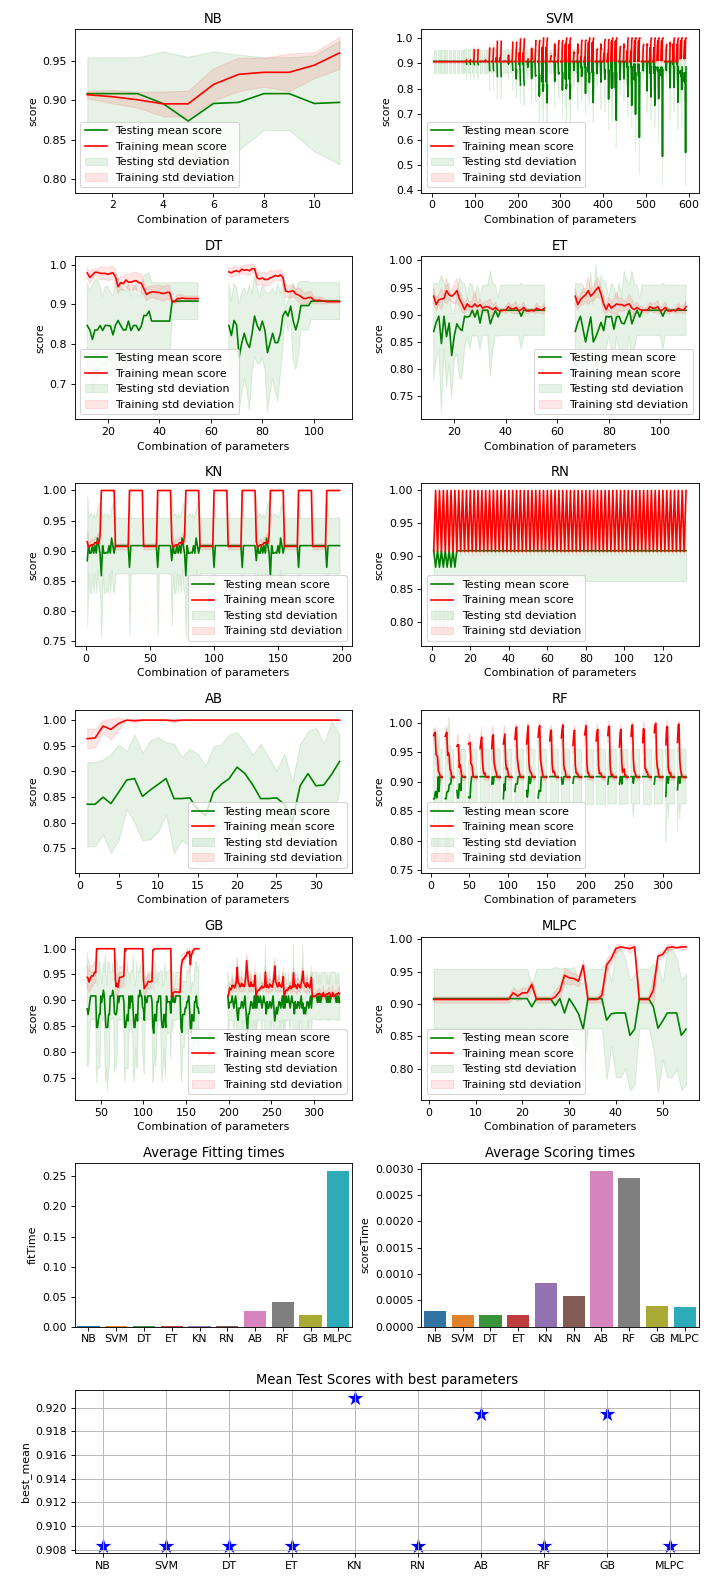

In [77]:
### TASK4b: Compares performance results for each type of classifier
poi_id.plot_classifiers_performance(clfs)

<IPython.core.display.Javascript object>


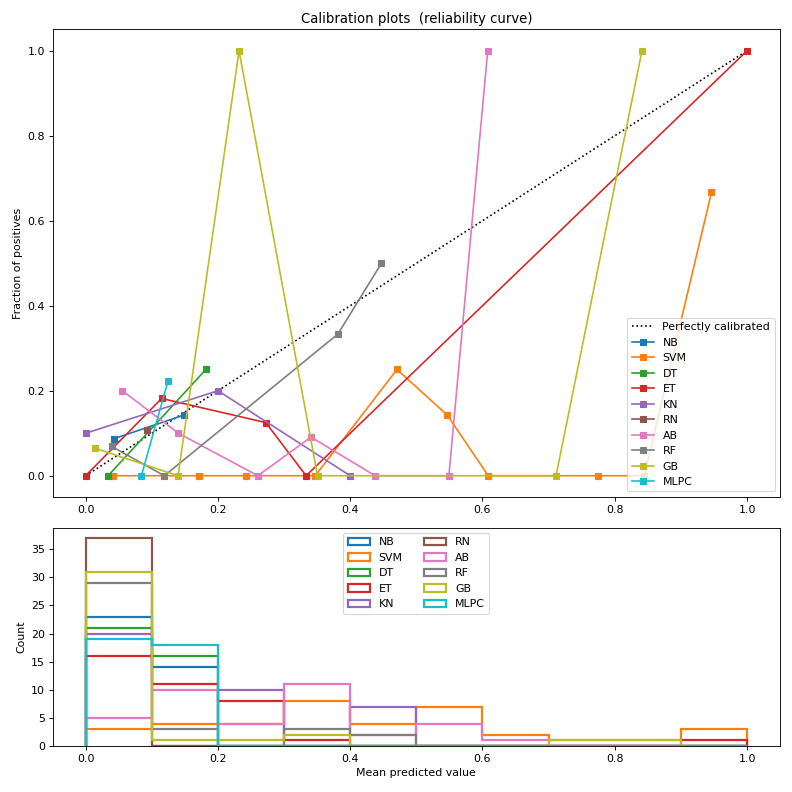

Best NB model: PCA(n_components=1, random_state=42) - GaussianNB()
Best SVM model: PCA(n_components=1, random_state=42) - SVC(C=1, degree=2, gamma=1, kernel='linear', random_state=42)
Best DT model: PCA(n_components=1, random_state=42) - DecisionTreeClassifier(min_samples_split=50, random_state=42)
Best ET model: PCA(n_components=5, random_state=42) - ExtraTreeClassifier(min_samples_split=10, random_state=42)
Best KN model: PCA(n_components=9, random_state=42) - KNeighborsClassifier()
Best RN model: PCA(n_components=1, random_state=42) - RadiusNeighborsClassifier(radius=2)
Best AB model: PCA(n_components=11, random_state=42) - AdaBoostClassifier(random_state=42)
Best RF model: PCA(n_components=1, random_state=42) - RandomForestClassifier(min_samples_split=20, n_estimators=10, random_state=42)
Best GB model: PCA(n_components=9, random_state=42) - GradientBoostingClassifier(criterion='mse', min_samples_split=5,
                           n_estimators=50, random_state=42)
Best MLPC model:

<IPython.core.display.Javascript object>


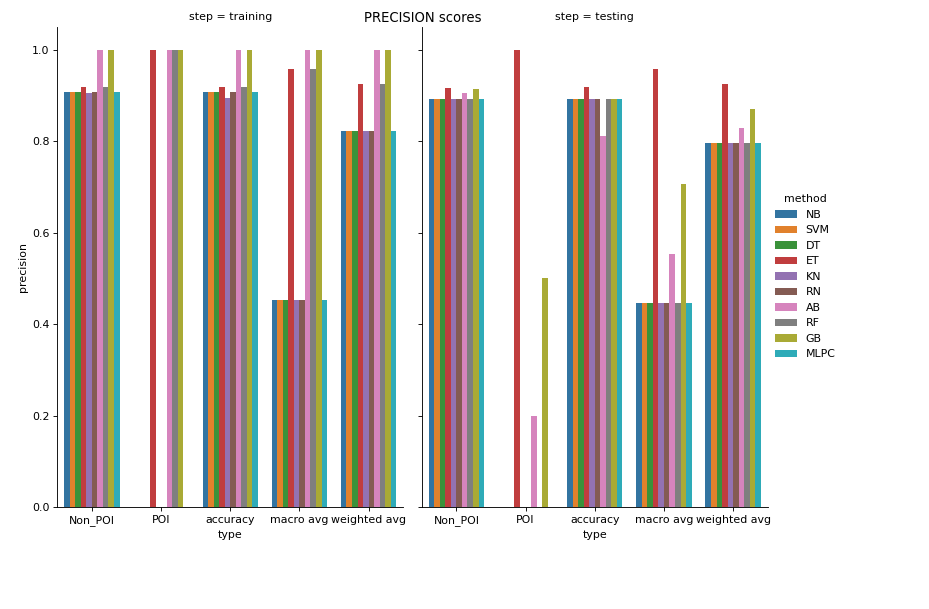

<IPython.core.display.Javascript object>


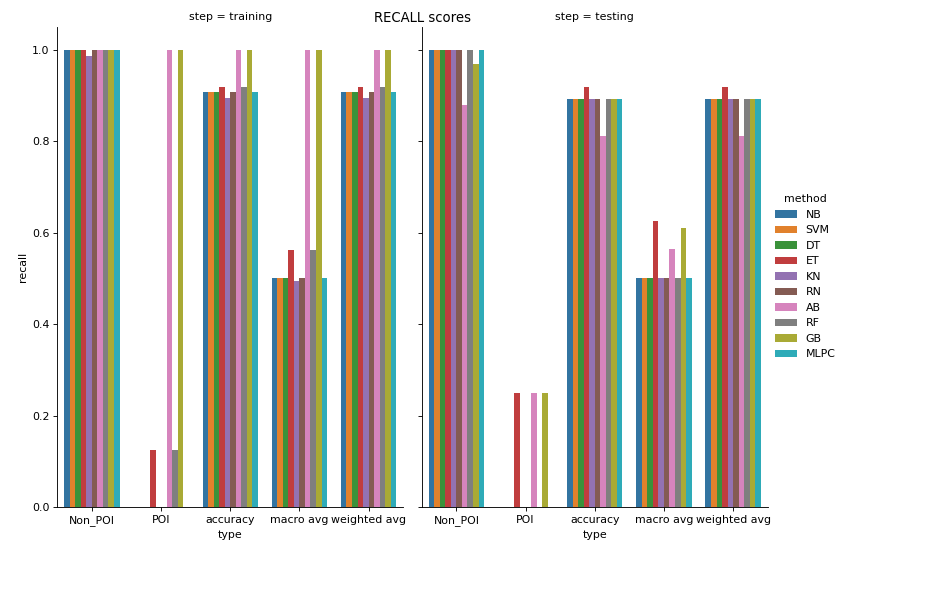

<IPython.core.display.Javascript object>


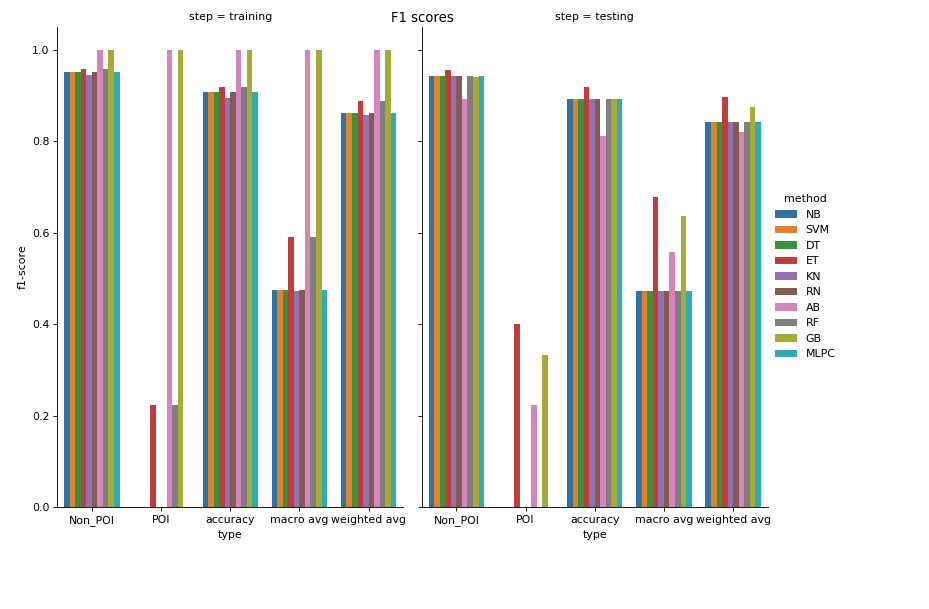

In [78]:
### TASK4c: Compares calibration results for each type of classifier
classReport = poi_id.task4_calibration_check(clfs, features_train, labels_train, features_test, labels_test)

In [79]:
### TASK5: Select best classifier option
clf = poi_id.task5_select_classifier(classReport, clfs, features_train, labels_train, features_test, labels_test,None)



###############################
Select classifier giving best precision for "poi" identification:
###############################
Best ET model: PCA(n_components=5, random_state=42) - ExtraTreeClassifier(min_samples_split=10, random_state=42)
The obtained accuracy was: 0.918918918918919
              precision    recall  f1-score   support

     Non_POI       0.92      1.00      0.96        33
         POI       1.00      0.25      0.40         4

    accuracy                           0.92        37
   macro avg       0.96      0.62      0.68        37
weighted avg       0.93      0.92      0.90        37



In [80]:
### TASK6: Exports classifier, dataset and features list
poi_id.task6_dump_results(clf, my_dataset, features_list)



###############################
Export obtained results:
###############################
Results succesfully exported.


The main findings of this analysis can be summarized as follows (but note that results may vary a little if the [Data Cleaning](#DW_DC) section is run several times as explained in the [Analysis Limitations](#limitations) section):

- 14 additional samples were considered as outliers and were discarded from the analysis.
- "exercised_stock_options" and "total_stock_value" correlated features were replaced by their principal component, thus the rest of correlations between features were always below 0.5.
- From the conducted gridsearch it was observed:
    * Some types of classifiers like AdaBoost seemed to have a trend to be overfitted with mean scores during training equal to 1 but reducing up to 0.8 during testing.
    * Some other types of classifiers like Naive-Bayes, DecisionTree, ExtraTree, GradientBoosting, ... seemed to provide a better fitting for certain configurations of parameters (although for some others there also seemed to be some kind of overfitting).
    * In terms of computation timings, MLP classifier significantly last longer than the rest of classifiers during the fitting step. However, the time during scoring was more similar to the rest of classifiers, except for AdaBoost and RandomForest classifiers which significantly last longer during scoring.
    * In terms of mean score (from cross validation) when the best parameters configuration for each type of classifier is selected, all classifiers resulted in similar accuracy scores between 90% and 92% matches. In particular, classifiers based on ensembles or in neighbors like ExtraTree, GradientBoosting, KNeighbors... seemed to provide the best results.
    * Despite of the mean score with the best parameters was higher than 90% for all classifiers, the calibration curves showed that all classifiers were in general far from being well calibrated with the available samples of data.  
    Some attempts were conducted to improve the calibration of some of the classifiers by means of "isotonic" or "Platt's logistic (sigmoid)" models, but without success. The reason of such behaviour was deemed consequence of the limited sample size and in particular of the significant difference between the number of "non-poi" and "poi" people. Finally, original classifiers were used for the analysis.
    * When looking at the precision, recall and f1-score for "identifying a poi person" when using the validation testing sample, it was observed that most of the classifiers resulted in poor probabilities, while for "identifying a non-poi person" the scores were much more acceptable. Again such results were due to the limited sample size and differences between the number of available clases.
- Finally, the best estimator for the classifier type providing the best precision on "identifying a poi person" during testing was selected as the final classifier. In this case, such classifier was an ExtraTreeClassifier, using as a criteria the mean squared error and with a minimum number of samples split of 10.  
>***Note:*** The GradientBoosting classifier was also identified as one of the best classifiers together with the ExtraTree classifier according to the selected criteria, thus the results using the best estimator for such classifier (using as a criteria the mean squared error, a minimum samples split of 5 and 50 estimators) were also obtained here below:

In [81]:
### Show results using the best estimator with GradientBoosting Classifier
poi_id.task5_select_classifier(classReport, clfs, features_train, labels_train, features_test, labels_test,'GB')



###############################
Select classifier giving best precision for "poi" identification:
###############################
Best GB model: PCA(n_components=9, random_state=42) - GradientBoostingClassifier(criterion='mse', min_samples_split=5,
                           n_estimators=50, random_state=42)
The obtained accuracy was: 0.8918918918918919
              precision    recall  f1-score   support

     Non_POI       0.91      0.97      0.94        33
         POI       0.50      0.25      0.33         4

    accuracy                           0.89        37
   macro avg       0.71      0.61      0.64        37
weighted avg       0.87      0.89      0.88        37



GradientBoostingClassifier(criterion='mse', min_samples_split=5,
                           n_estimators=50, random_state=42)

#### Answers to Objectives/Questions:

***1. Summarize the goal of the project and how machine learning is useful in trying to accomplish it. Give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?***

- Goal of the project: See [Introduction](#intro) and [Objectives Definition](#objDef) sections.
- Dataset background: See [Data Acquisition](#DW_DA) section.
- Outliers: In this report, outliers where managed in two different steps:
    * Initial outliers identification & removal step was conducted at the [Data Cleaning](#DW_DC) section using a common criteria based on the z-score of each sample value. The main objective of this initial step was to discard from the initial feature selection process those values that really differed from the main distribution of the data on each feature.
    * A second outliers identification & removal step was conducted at the [Data Exploration](#eda) section with the aim of fine-tuning the final selection of the data really used for the classificators for example to avoid significantly biassed samples of data during cross-validation or data splitting. In this second step, a Local Outlier Factor classifier was used to discard those samples of data that were found most of the times considered as an outlier when looking at the different features.

***2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.***

- The final features selected for the POI identifier were 12: 'bonus', 'deferred_income', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'long_term_incentive', 'restricted_stock', 'salary', 'shared_receipt_with_poi', 'total_payments' and  'total_stock_value' (see [Analysis Limitations](#limitations) section for caveats).  
As explained at the [Data Cleaning](#DW_DC) section, these features were selected after discarding 4 features that contained more than 70% of NaN values, a PCA study to determine the number of components that contained at least the 95% explained variance ratio (12 components) and using a SelectKBest method based on a chi2 scoring model (see [Data Cleaning](#DW_DC) section for reasons, scores and p-values).  
Note that, despite of 12 features were initially selected to build the classifier, a Principal Components Analysis was also used in a pipeline with the classifiers, and a grid search over the number of components from 1 to 12 was conducted so that, the final number of components really used by the classifier was 5 for the ExtraTree best estimator classifier (and 9 in the case of the GradientBoosting classifier).
- Like for the outliers, data was scaled twiced during the report:
    * A first data scaling step was conducted at the [Data Cleaning](#DW_DC) section during the initial features selection step to assure a fair PCA study. A MinMaxScaler was used for that purpose.
    * A second data scaling step was conducted at the [Data Exploration](#eda) section after the second outliers removal step to assure consistency of the data. The same type of scaler based on minimum and maximum values was used.    
- During the features selection process it was observed that the "exercised_stock_options" and the "total_stock_value" features had a significant correlation between each other, which is not normally good for learning algorithms so it was decided to create a new feature called "stock_features" containing the principal component between them. Thus, all features finally used for the study had a correlation below 0.5 between each other.


***3. What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?***  

In this report, it was decided to conduct a dimensionality reduction step by means of a Principal Components Analysis followed by a non-ordered supervised Classification to try to identify on a first step those components containing the most useful information for the subsequent classification, iterating this process over all possible number of components and over certain parameters of the classifiers and making cross-validation to minimize the risk of biassed results. A total of 10 different classifiers were compared to each other in terms of accuracy score, time lapse for fitting the model, time lapse for scoring the model and in terms of the precision, recall and f-1 scores obtained for each of the classes during the predictions.

- The following types of classifiers were used in this study: Naive-Bayes, Support Vector Machine, Decision Tree, Extra Tree, Adaboost, Random Forest, Gradient Boosting, K-Neighbors, Radius Neighbors and MLP Neural networks.
- In terms of fitting time, the MLP Neural Networks classifier significantly last longer that any of the others classifiers but once trained, the time for scoring was similar to the other methods, except from AdaBoost and RandomForest classifiers which took significantly more time than the others classifiers during scoring.
- In terms of accuracy score, the KNeighbors classifier gave the highest mean_test_score during the fitting of the classifiers (0.921) while the rest of classifiers resulted in values between 0.9 and 0.92. However, when looking at the precision and recall of each classifier when using the testing set of data for validation (this is, data not used for training) it was observed that all classifiers did not work very well when trying to identify the "POI" class, being in that case an ExtraTree or GradientBoosting classifiers the ones giving the highest precision.  
Note that another way of doing this analysis could have been selecting in "TASK4a)" an scoring method based on 'precision' instead of on 'accuracy' and then selecting directly the best estimator giving the highest mean_test_score. Results would be the same but it was quite interesting to see how the plots in "TASK4b)" were updated showing the differences on the obtained precisions during training and testing. 

***4. What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).***

"Tuning the parameters of an algorithm" can be expressed like searching the best combination of parameters/settings of a certain model/classifier that provides the optimum configuration according to a certain predefined criteria, normally defined by a certain scoring method. Such step is normally an important step in Machine Learning algorithms because normally classifiers have several parameters that can be tuned and the performance and results of the algorithm can be completely different depending on the selected combination. For example, the plots provided in this report in "TASK4b)" clearly show how different the results of the classifiers can be dependending on the selected configuration (combination of parametes) of the classifier.

At the beggining of this section it was summarized the different parameters that were tuned for each of the 10 selected classifiers, normally searching for the best combination of at least 2 or 3 parameters, if possible. This fine-tuning process of the classifiers was also combined with a tuning process of the number of principal components feeding the classifier, thus trying to optimize not only the classifier outputs but also its inputs.

***5. What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?***

Within the scope of Machine Learning algorithms, validation is understood as the process of testing the developed model/algorithm with a dataset that has not been used for training or fitting the model/classifier, thus like simulating a real use of the model/classifier with new data. This process is also very important in Machine Learning algorithms because models can respond very well to the data they were trained for, but they can be very bad in a real situation when new data is used and a prediction/estimation is wanted. This is a classic mistake that one can make when developing a new model which is commonly known as "overfitting" which can be described as the tendency of a model to provide very good results for the dataset that was used to train the model, but it does not work properly when predictions are done on new data points.  
One example of this could be the results obtained above with the AdaBoost classifier method that the accuracy obtained during training was most of the times 1 but then when testing a new dataset it dropped until 0.8 for a certain compination of parameters. This is an indication that the model can be overfitted and/or that the tuning of the parameters of the classifier was not good enough.

A common practice to validate the results of a certain model/classifier is to split the original dataset in two datasets: one for training the model and one for validation. In this study, 30% of the original dataset was reserve for validation before doing any fine-tuning of parameters and before training any model. Moreover, such split was done using a stratified method to avoid getting a biassed split (thus it is assure all clases are present in all splits).  
Once the final classifier was selected, predictions were performed over this 30% reserved dataset to assess and validate the behaviour of the developed classifier.

***6. Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance.*** 

Several evaluation metrics were used along this report for several purposes (chi2, z-score, accuracy, precision, recall,...). In particular for the final selected classifier, 3 scoring metrics were calculated over the predictions made during the final validation: 

- Precision: In this study, it can be described as the probability of a person to be a "poi"/"non_poi" when it has been classified by the model as a "poi"/"non_poi".
    * ExtraTree Classifier: Good precisions were obtained for both classes "POI" and "Non_POI", being at first the probability of a person to be a "poi" when it has been predicted as a "poi" equal to 100%. Most likely, the real precision of the classifier will be smaller than 100% but it is true that with the testing/validation sample of data no "False positive" was found and one person was classified as "poi" and he was a "poi".
    * GradientBoosting Classifier: One "False positive" was also found and so, the obtained precision dropped to 50%.
- Recall: In this study, it can be described as the probability of correctly identifying a "poi"/non-poi" person when it is actually a "poi"/"non-poi" person.
    * ExtraTree Classifier: A 100% probability of identifying correctly a "Non_POI" when it is not a "poi" was obtained. However, the probability of identifying correctly a "POI" when it actually is a "poi" was only 25%, thus indicating that in general the classifier is only able to identify 1 out of 4 cases that a person is a "poi".
    * GradientBoosting Classifier: It provided very similar results than the ExtraTree classifier.
- F1-score: Mathematically speaking, it is the harmonic mean of the precision and recall and, in other words, it can be expressed as an average value of the precision and the recall which is useful to provide a unique metric combining the previous two. A value close to 1 would indicate that both the probability of identifying a "poi"/"non-poi" person when it is and the probability of correctly predicting a "poi"/"Non_poi" are high.
    * ExtraTree Classifier: A 0.96 score was obtained for the "Non_POI" class but it was only 0.4 for the "POI" one.
    * GradientBoosting Classifier: Slightly smaller values were obtained: 0.94 for the "Non_POI" class and 0.33 for the "POI" class.

---

## Analysis Limitations<a name='limitations'></a>

---
<a name='DE_SelTab'></a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#intro"><span style="color:red">Back to Introduction</span></a></button> <button name="button"><a href="#wrangling"><span style="color:red">Back to Data Wrangling</span></a></button> <button name="button"><a href="#eda"><span style="color:red">Back to Data Exploration</span></a></button> <button name="button"><a href="#conclusions"><span style="color:black">Forward to Conclusions</span></a></button>

---

The main limitation of the analysis conducted in this report was related to the limited number of samples (together with a considerable number of features) and the big ammount of NaN values present. 

During the [Data Cleaning](#DW_DC) process, NaN values were replaced by randomly generated samples of numbers trying to preserve the variance of the original features. Such decision had the advantage of preserving quite well the variance of the original data for the conducted PCA study but it had the disadvantage that, in the available dataset, several features had a similar weight in terms of scoring and/or p-values so, when trying to select the best features, different results were obtained when running the study several times (depending on the randomly generated samples).  
In general, results varied as follows:

- Features that were always selected: bonus, deferred_income, exercised_stock_options, from_messages, from_poi_to_this_person, long_term_icentive, restricted_stock, salary, shared_receipt_with_poi and total_stock_value
- Features that were sometimes selected: expenses, from_this_person_to_poi, other, to_messages and total_payments

Such variation also affected to the posterior selection of classifiers, thus different final classifiers were obtained when running the study several times. Although this was not ideal, it was deemed acceptable as the variations on the selected features were due to similar contributions of some of the features, thus the impact of selecting one or another was not that important and, in addition, the study process was always built over a pipeline made by a first PCA step and a second CLASSIFIER step, thus the best number of principal components was always tuned during the gridsearch.  
Note that, if the reader wants to get always the same classification results, the "Data Wrangling" section shall be executed only once, thus the same features will be always used in the "Data Exploration" section (as the data will be always loaded from a stored pickle file).

---

## Analysis Conclusions<a name='conclusions'></a>

---
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<button name="button"><a href="#intro"><span style="color:red">Back to Introduction</span></a></button> <button name="button"><a href="#wrangling"><span style="color:red">Back to Data Wrangling</span></a></button> <button name="button"><a href="#eda"><span style="color:red">Back to Data Exploration</span></a></button> <button name="button"><a href="#limitations"><span style="color:red">Back to Limitations</span></a></button>

---

After the initial Data Cleaning process, 12 main features (containing finantial and specific information of people related to the Enron compony) were selected for developing a Person of Interest (POI) identifier based on Machine Learning algorithms.  
The main conclusions of such analysis were:

- Some data points were considered outliers and were discarded. 
- Two of the features were significantly correlated to each other so were reduced into just one component by means of a PCA dimensionality reduction step.
- All features were scaled again using an scaler based on minimum and maximum values.
- Up to 10 different classifiers were analyzed and fine-tuned trying to find the best estimator for a "poi" identifier. In such process, classifiers were combined with a PCA model in a pipeline to optimize the output of the classifier taking also into account its inputs. The calibration curves of all classifiers showed a lack of calibration with all methods with the available data, mainly due to the limited size of the sample and the different percentages of classes.
- Finally, an ExtraTree Classifier feed by 5 components and configured with a minimum samples split of 10 was identified as the best estimator providing the highest precision when identifying a "poi" person while also providing a good general accuracy.